In [1]:
#imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,  StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import (
    mutual_info_regression,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)

# Preprocessing

In [2]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')


In [3]:
train = train_transaction.merge(train_identity, on='TransactionID', how='left')
test = test_transaction.merge(test_identity, on='TransactionID', how='left')

In [4]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Rows, Cols = train.shape
print("Number of Row in Data = ", Rows)
print("Number of Columns in Data = ", Cols)

Number of Row in Data =  6888
Number of Columns in Data =  434


In [7]:
Rows, Cols = test.shape
print("Number of Row in Data = ", Rows)
print("Number of Columns in Data = ", Cols)

Number of Row in Data =  6432
Number of Columns in Data =  433


In [8]:
train.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,5506
id_37,5506
id_38,5506
DeviceType,5506


In [9]:
test.isnull().sum()

,0
TransactionID,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
...,...
id-36,5683
id-37,5683
id-38,5683
DeviceType,5685


In [10]:
import pandas as pd
import numpy as np

categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in train.columns if train[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
train.drop(columns=drop_cols, inplace=True)

#Fill missing values in categorical columns with mode
for col in categorical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)

#Fill missing values in numerical columns with mean
for col in numerical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mean_val = train[col].mean()
        train[col] = train[col].fillna(mean_val)

#In case any values remain
train = train.fillna("unknown")

# Final check
print("Missing values after processing:")
print(train.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D6', 'D7', 'D12', 'D13', 'D14', 'id_03', 'id_04', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']
Missing values after processing:
0 missing values remaining.


In [11]:
categorical_cols = test.select_dtypes(include=['object']).columns.tolist()
numerical_cols = test.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in test.columns if test[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
test.drop(columns=drop_cols, inplace=True)

for col in categorical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mode_val = test[col].mode()[0]
        test[col] = test[col].fillna(mode_val)


for col in numerical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mean_val = test[col].mean()
        test[col] = test[col].fillna(mean_val)


test = test.fillna("unknown")


print("Missing values after processing:")
print(test.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id-03', 'id-04', 'id-07', 'id-08', 'id-09', 'id-10', 'id-14', 'id-18', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-30', 'id-32', 'id-33', 'id-34', 'DeviceInfo']
Missing values after processing:
0 missing values remaining.


Finally no NaNs

In [12]:
train.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,0
id_37,0
id_38,0
DeviceType,0


In [13]:
test.isnull().sum()

,0
TransactionID,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
...,...
id-35,0
id-36,0
id-37,0
id-38,0


In [14]:
train.dtypes

,0
TransactionID,int64
isFraud,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
...,...
id_36,object
id_37,object
id_38,object
DeviceType,object


In [15]:
test.dtypes

,0
TransactionID,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
card1,int64
...,...
id-35,object
id-36,object
id-37,object
id-38,object


In [16]:
categorical_columns1 = train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns1)

Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns1:
    train[col] = label_encoder.fit_transform(train[col])

target_column = 'isFraud'

numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(target_column)

scaler = StandardScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])




In [18]:
categorical_columns2 = test.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns2)

Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id-12', 'id-15',
       'id-16', 'id-28', 'id-29', 'id-31', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType'],
      dtype='object')


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


label_encoder = LabelEncoder()
for col in categorical_columns2:
    test[col] = label_encoder.fit_transform(test[col])


numerical_columns = test.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()
test[numerical_columns] = scaler.fit_transform(test[numerical_columns])




In [20]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,-1.731799,0,-1.964670,-0.302995,0.495381,0.880208,0.000000,-0.26996,-2.792992,-1.483019,...,-0.282812,-5.272606e-15,0.039806,0.174741,0.287539,-0.12798,0.213023,0.164276,-0.278562,0.172892
1,-1.731296,0,-1.964641,-0.470016,0.495381,-1.469366,0.348796,-0.26996,-1.028026,-2.509184,...,-0.282812,-5.272606e-15,0.039806,0.174741,0.287539,-0.12798,0.213023,0.164276,-0.278562,0.172892
2,-1.730794,0,-1.962698,-0.343165,0.495381,-1.068060,0.897684,-0.26996,0.736940,-0.867320,...,-0.282812,-5.272606e-15,0.039806,0.174741,0.287539,-0.12798,0.213023,0.164276,-0.278562,0.172892
3,-1.730291,0,-1.961841,-0.381220,0.495381,1.764847,1.389129,-0.26996,-1.028026,-2.124372,...,-0.282812,-5.272606e-15,0.039806,0.174741,0.287539,-0.12798,0.213023,0.164276,-0.278562,0.172892
4,-1.729788,0,-1.961641,-0.381220,-1.741629,-1.102974,1.050861,-0.26996,-1.028026,-2.509184,...,4.661875,3.842033e+00,2.558537,0.174741,0.287539,-0.12798,0.213023,0.164276,3.589860,-3.637365


In [21]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-19,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType
0,-1.731782,-2.065214,-0.455033,0.349356,0.101527,-1.535276,-0.123578,0.693065,0.616592,0.474,...,1.185054e-15,0.0,-0.229941,-0.230689,-0.184063,0.241336,-0.072898,0.166253,-0.199838,-0.244208
1,-1.731243,-2.064541,-0.383504,0.349356,-1.186760,-1.535276,-0.123578,0.693065,0.616592,0.474,...,1.185054e-15,0.0,-0.229941,-0.230689,-0.184063,0.241336,-0.072898,0.166253,-0.199838,-0.244208
2,-1.730704,-2.063730,0.128318,0.349356,-1.143936,1.430229,-0.123578,0.693065,0.616592,0.474,...,1.185054e-15,0.0,-0.229941,-0.230689,-0.184063,0.241336,-0.072898,0.166253,-0.199838,-0.244208
3,-1.730166,-2.063730,0.606369,0.349356,0.223281,0.059563,-0.123578,0.693065,-0.886958,0.474,...,1.185054e-15,0.0,-0.229941,-0.230689,-0.184063,0.241336,-0.072898,0.166253,-0.199838,-0.244208
4,-1.729627,-2.063609,-0.304004,0.349356,1.698818,0.648821,-0.123578,-1.220973,-2.114858,0.474,...,1.185054e-15,0.0,-0.229941,-0.230689,-0.184063,0.241336,-0.072898,0.166253,-0.199838,-0.244208


In [22]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,6888.000000,6888.000000,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,...,6888.000000,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03,6.888000e+03
mean,0.000000,0.024535,-1.980607e-16,-1.650506e-17,-1.237879e-16,-1.547349e-17,-1.774294e-16,-3.197855e-16,1.031566e-18,-6.684548e-16,...,0.000000,-5.236230e-15,-2.532495e-16,2.599547e-16,-9.903035e-17,-3.404168e-17,-2.578915e-16,2.349392e-16,1.444193e-17,-1.650506e-16
std,1.000073,0.154716,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,...,1.000073,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-1.731799,0.000000,-1.964670e+00,-5.846218e-01,-2.487298e+00,-1.832181e+00,-1.591458e+00,-5.282580e+00,-4.557958e+00,-2.560492e+00,...,-4.040774,-2.094393e+00,-6.436932e+00,-1.081719e+01,-3.477795e+00,-1.279802e-01,-4.694336e+00,-6.087302e+00,-2.785624e-01,-7.724732e+00
25%,-0.865900,0.000000,-4.869713e-01,-4.021305e-01,4.953812e-01,-7.144986e-01,-9.915113e-01,-2.699596e-01,-1.028026e+00,-8.673199e-01,...,-0.282812,-5.272606e-15,3.980573e-02,1.747410e-01,2.875385e-01,-1.279802e-01,2.130227e-01,1.642764e-01,-2.785624e-01,1.728918e-01
50%,0.000000,0.000000,1.010998e-02,-2.670541e-01,4.953812e-01,-5.995806e-02,-4.053148e-02,-2.699596e-01,7.369399e-01,6.206195e-01,...,-0.282812,-5.272606e-15,3.980573e-02,1.747410e-01,2.875385e-01,-1.279802e-01,2.130227e-01,1.642764e-01,-2.785624e-01,1.728918e-01
75%,0.865900,0.000000,5.204365e-01,4.161707e-02,4.953812e-01,7.937105e-01,9.615077e-01,-2.699596e-01,7.369399e-01,6.719277e-01,...,-0.282812,-5.272606e-15,3.980573e-02,1.747410e-01,2.875385e-01,-1.279802e-01,2.130227e-01,1.642764e-01,-2.785624e-01,1.728918e-01
max,1.731799,1.000000,2.194156e+00,1.314073e+01,4.953812e-01,1.819112e+00,1.599749e+00,6.146194e+00,7.369399e-01,9.541231e-01,...,4.661875,3.842033e+00,9.754912e+00,1.747410e-01,2.875385e-01,7.813709e+00,2.130227e-01,1.642764e-01,3.589860e+00,1.281330e+00


In [23]:
test.describe()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-19,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType
count,6432.000000,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,...,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03,6.432000e+03
mean,0.000000,2.460387e-14,-5.302558e-17,-4.418798e-17,5.744438e-17,-4.915913e-16,1.004172e-15,2.098929e-16,2.761749e-16,1.657049e-16,...,1.224007e-15,3.976918e-17,-1.546579e-17,3.314099e-17,2.032647e-16,-8.837596e-17,1.712284e-17,2.032647e-16,-6.186317e-17,7.511957e-17
std,1.000078,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,...,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-1.731782,-2.065214e+00,-5.848178e-01,-3.454380e+00,-1.867325e+00,-1.605731e+00,-5.997451e+00,-5.049048e+00,-2.540864e+00,-2.109703e+00,...,-5.152547e+00,-5.404619e+00,-2.299409e-01,-2.306894e-01,-4.876742e+00,-4.143609e+00,-7.289829e-02,-6.014914e+00,-1.998383e-01,-2.442080e-01
25%,-0.865891,-7.957310e-01,-3.835038e-01,3.493559e-01,-7.230439e-01,-1.003663e+00,-1.235778e-01,-1.220973e+00,-8.869585e-01,4.740003e-01,...,1.185054e-15,0.000000e+00,-2.299409e-01,-2.306894e-01,-1.840634e-01,2.413355e-01,-7.289829e-02,1.662534e-01,-1.998383e-01,-2.442080e-01
50%,0.000000,2.514574e-01,-2.660364e-01,3.493559e-01,-8.929155e-02,-3.971390e-02,-1.235778e-01,6.930649e-01,6.165917e-01,4.740003e-01,...,1.185054e-15,0.000000e+00,-2.299409e-01,-2.306894e-01,-1.840634e-01,2.413355e-01,-7.289829e-02,1.662534e-01,-1.998383e-01,-2.442080e-01
75%,0.865891,7.880194e-01,2.343688e-02,3.493559e-01,8.091716e-01,8.922104e-01,-1.235778e-01,6.930649e-01,6.165917e-01,4.740003e-01,...,1.185054e-15,0.000000e+00,-2.299409e-01,-2.306894e-01,-1.840634e-01,2.413355e-01,-7.289829e-02,1.662534e-01,-1.998383e-01,-2.442080e-01
max,1.731782,1.763564e+00,3.203956e+01,3.493559e-01,1.775859e+00,1.596758e+00,8.452278e+00,6.930649e-01,8.671834e-01,4.740003e-01,...,6.709791e+00,4.637210e+00,4.348944e+00,4.334832e+00,6.743224e+00,2.413355e-01,1.371774e+01,1.662534e-01,5.004047e+00,4.094869e+00


In [24]:
train.duplicated().sum()

np.int64(0)

In [25]:
test.duplicated().sum()

np.int64(0)

# EDA , Univariate Analysis

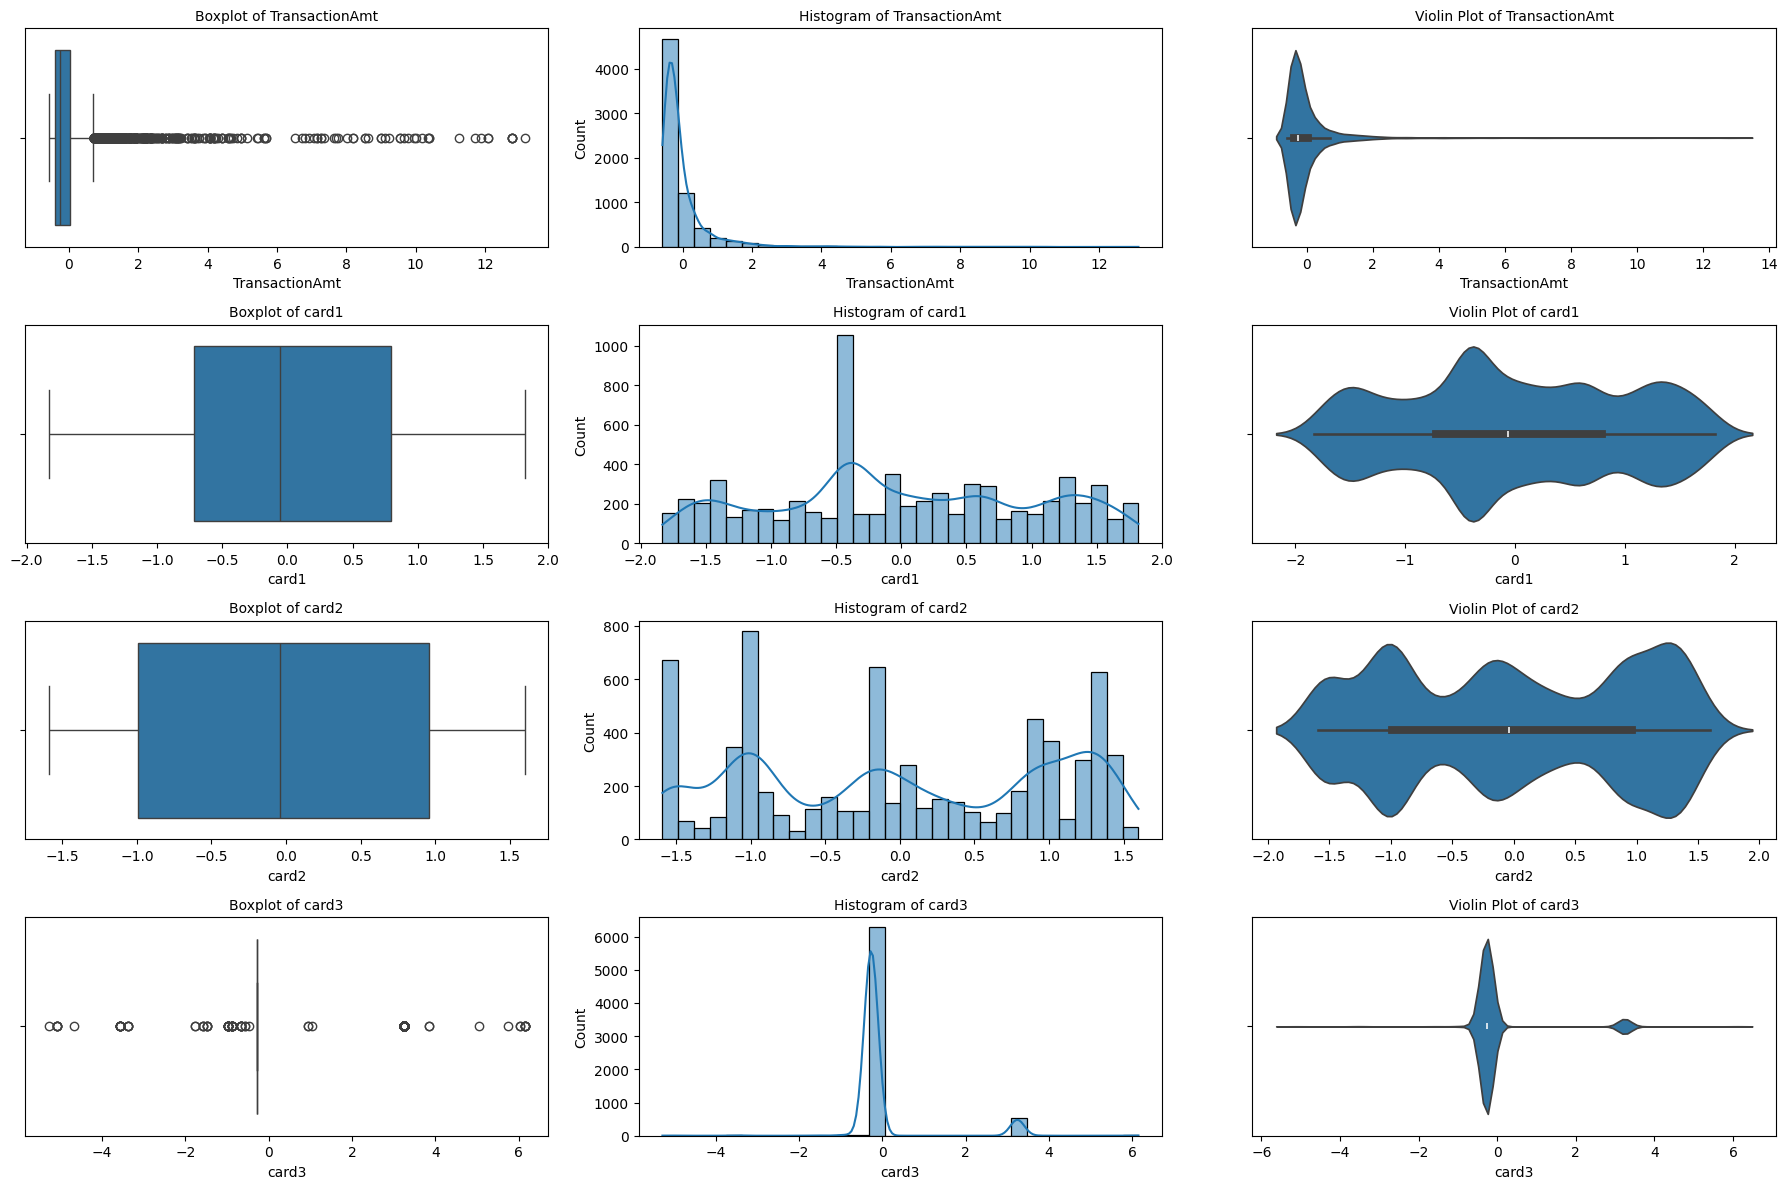

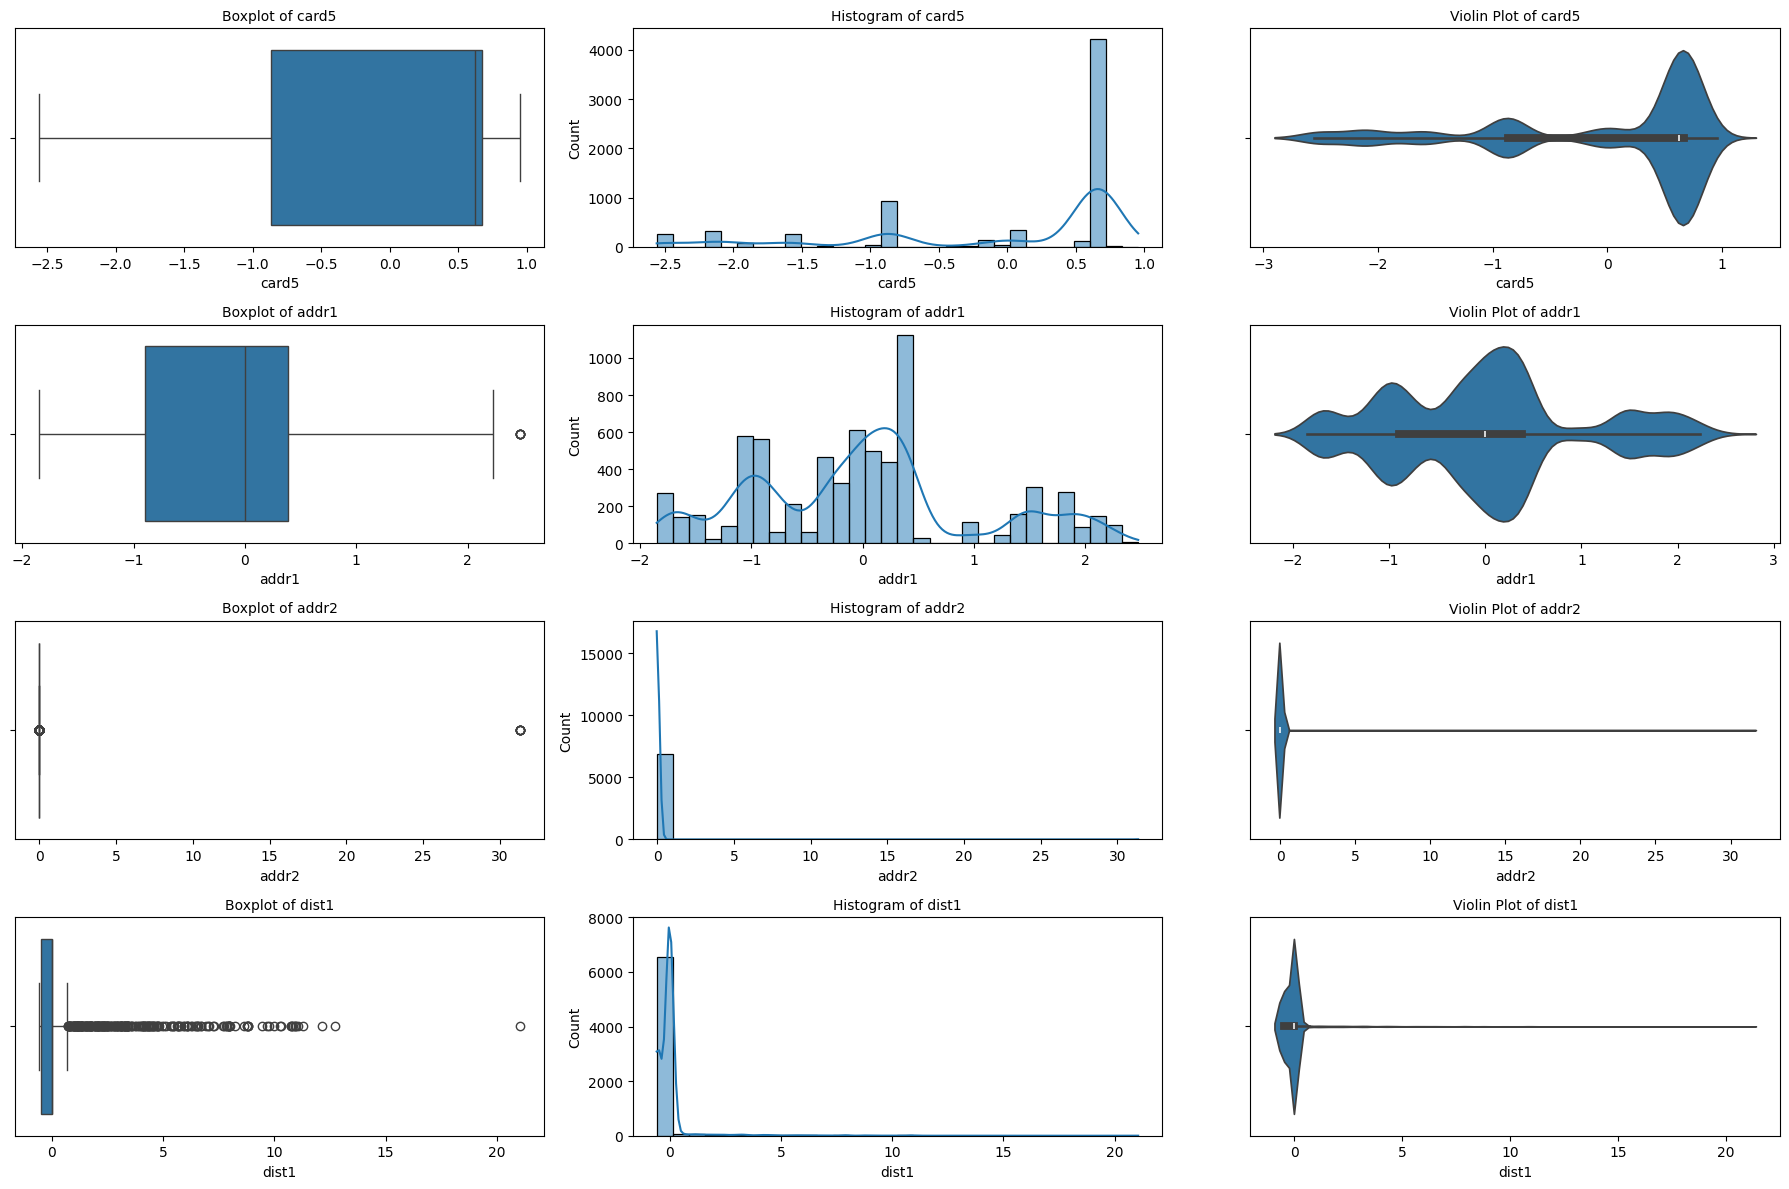

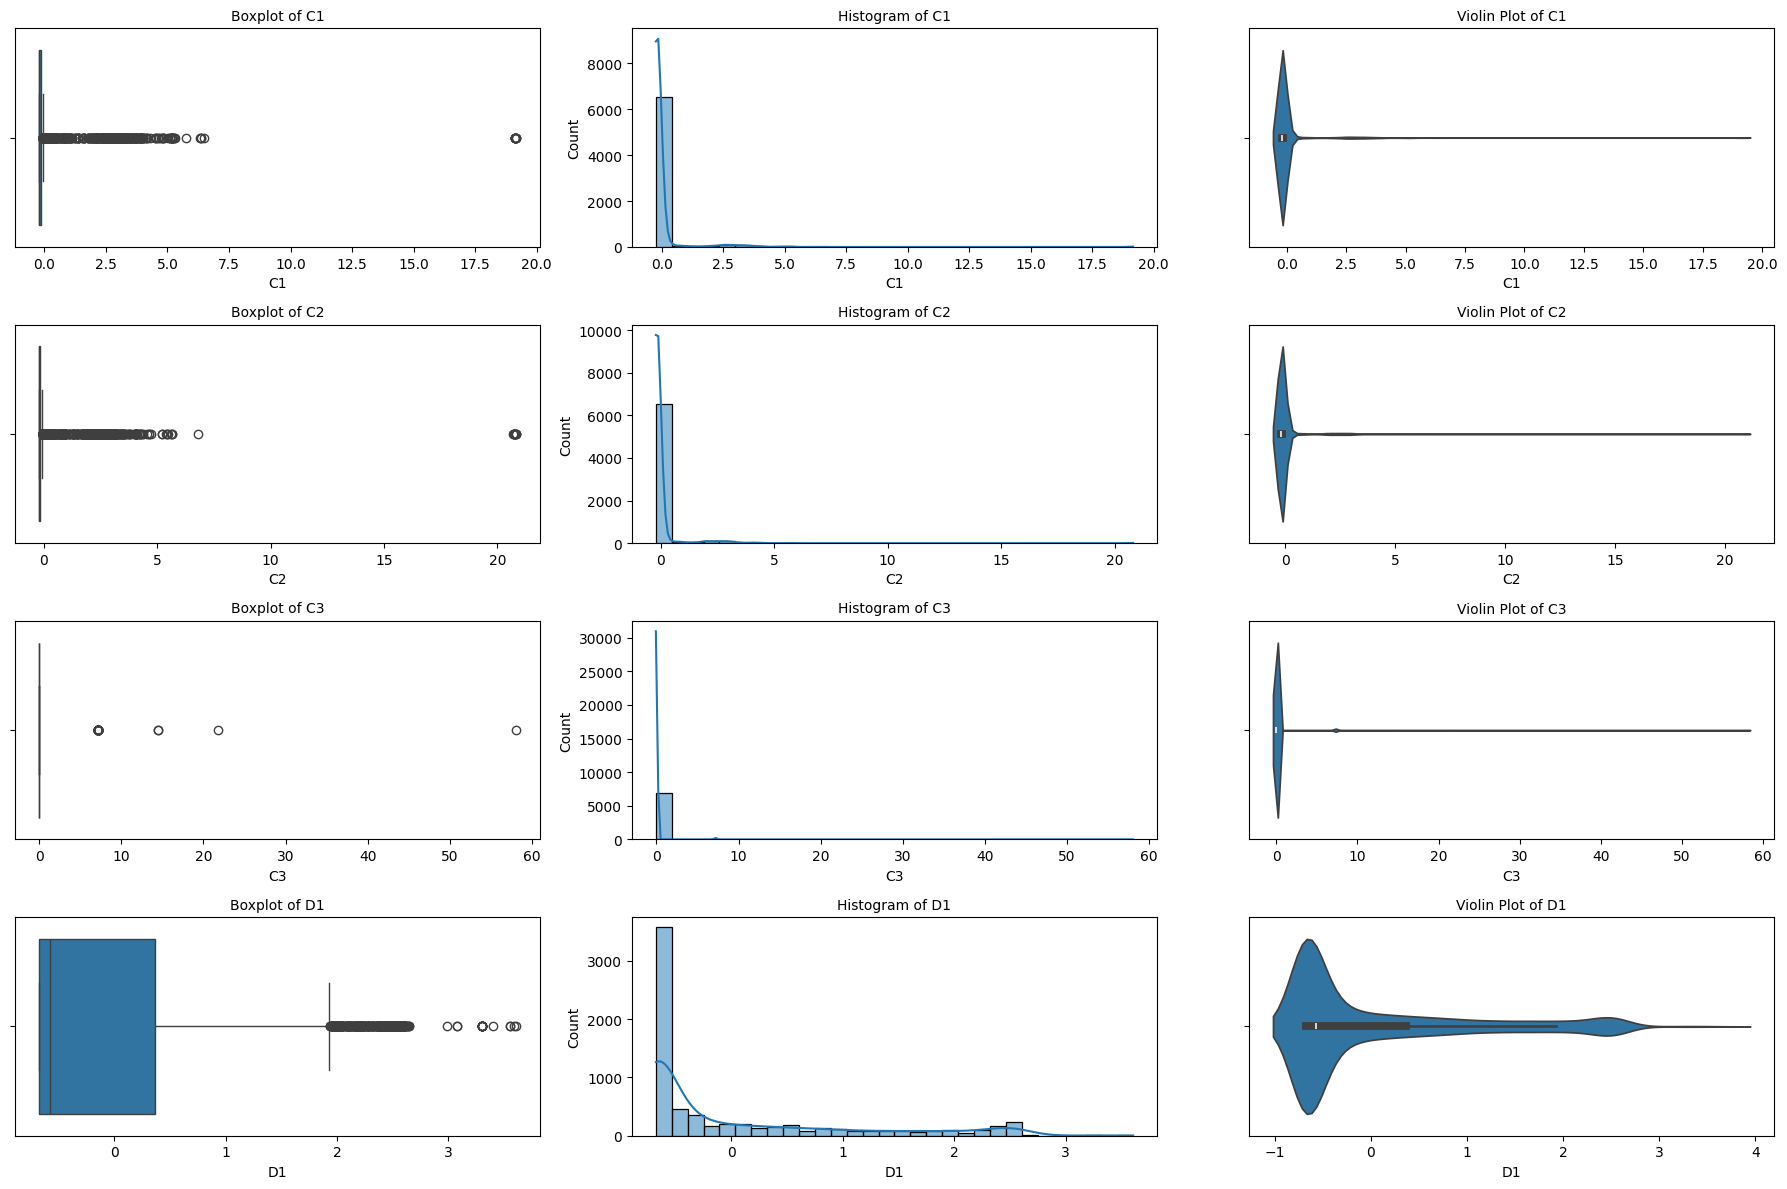

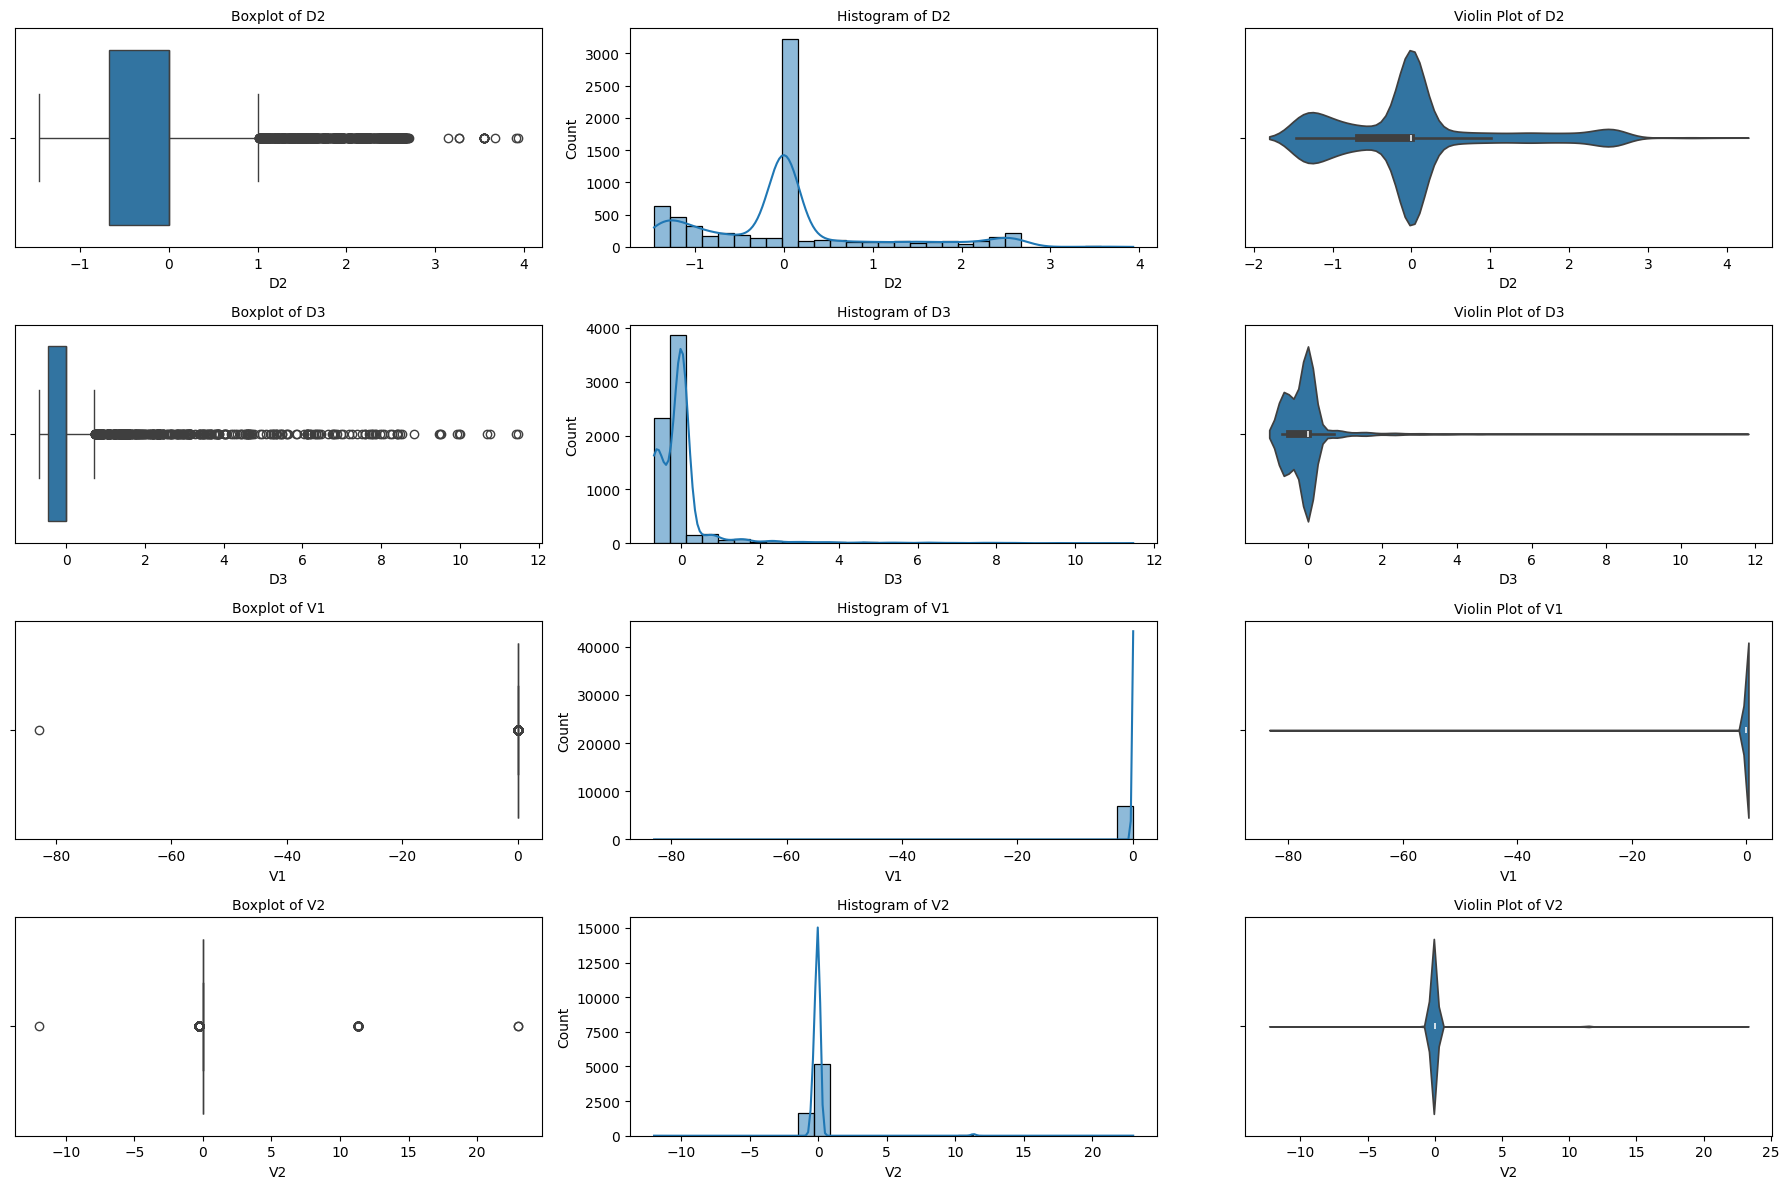

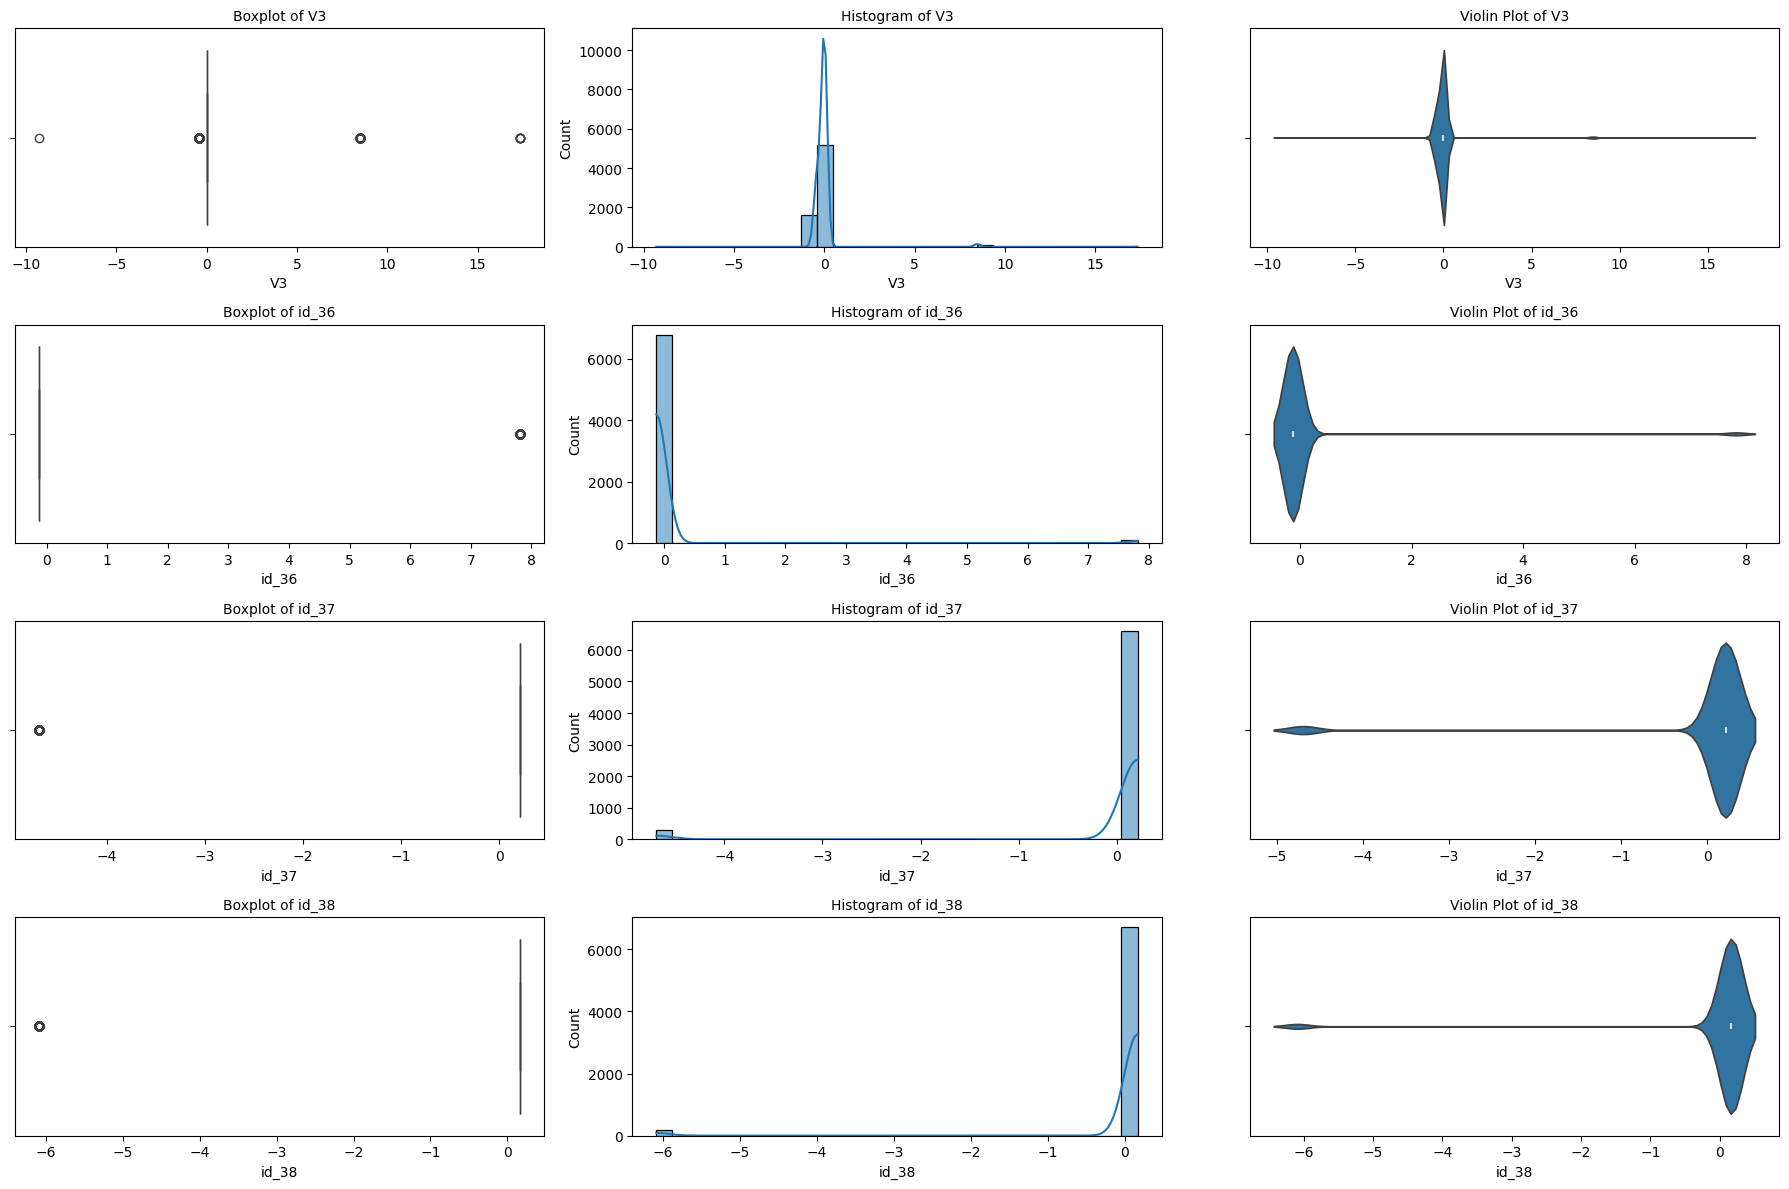

In [26]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]


selected_features = [col for col in important_features if col in train.columns]

# Set batch size for readable plots
batch_size = 4

for i in range(0, len(selected_features), batch_size):
    batch = selected_features[i:i + batch_size]
    plt.figure(figsize=(18, 12))

    for j, col in enumerate(batch):
        # Boxplot
        plt.subplot(len(batch), 3, j * 3 + 1)
        sns.boxplot(x=train[col])
        plt.title(f'Boxplot of {col}', fontsize=10)

        # Histogram
        plt.subplot(len(batch), 3, j * 3 + 2)
        sns.histplot(train[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}', fontsize=10)

        # Violin plot
        plt.subplot(len(batch), 3, j * 3 + 3)
        sns.violinplot(x=train[col])
        plt.title(f'Violin Plot of {col}', fontsize=10)

    plt.tight_layout()
    plt.show()


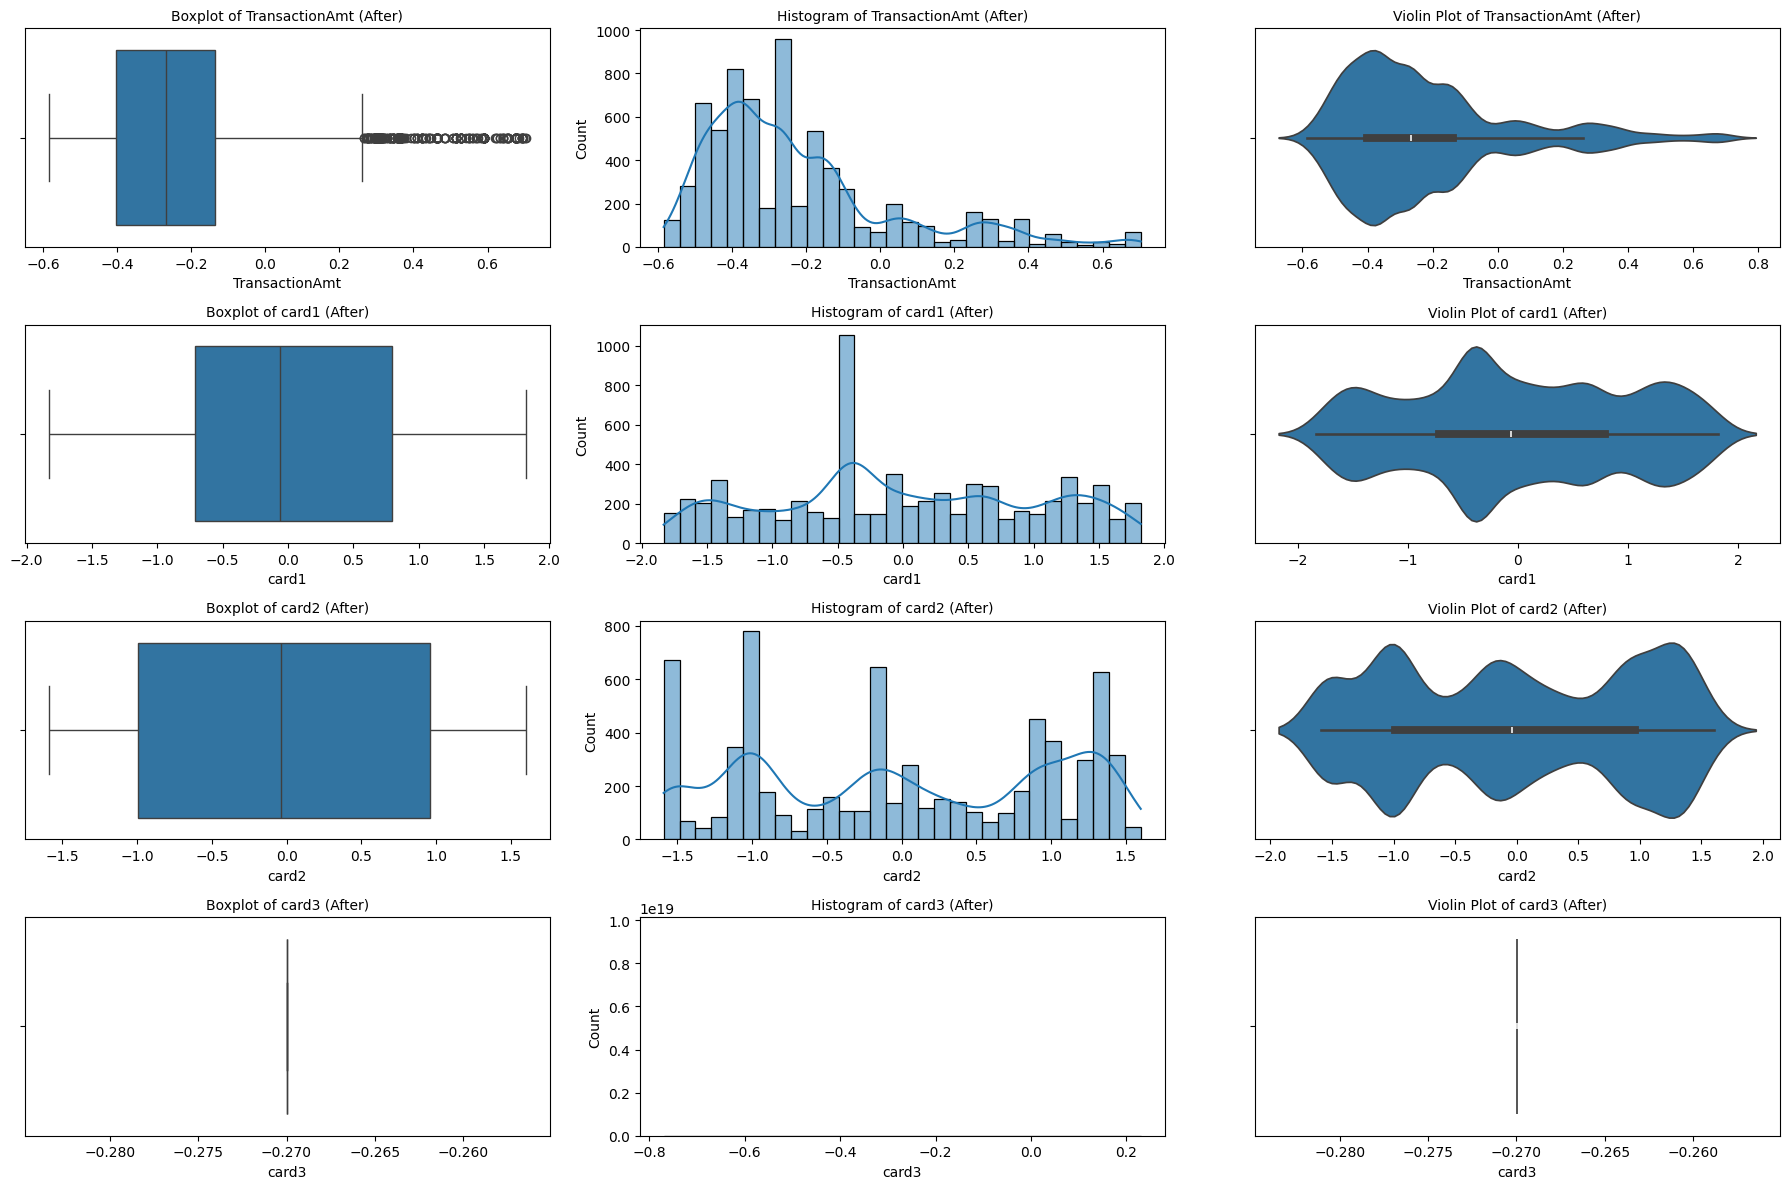

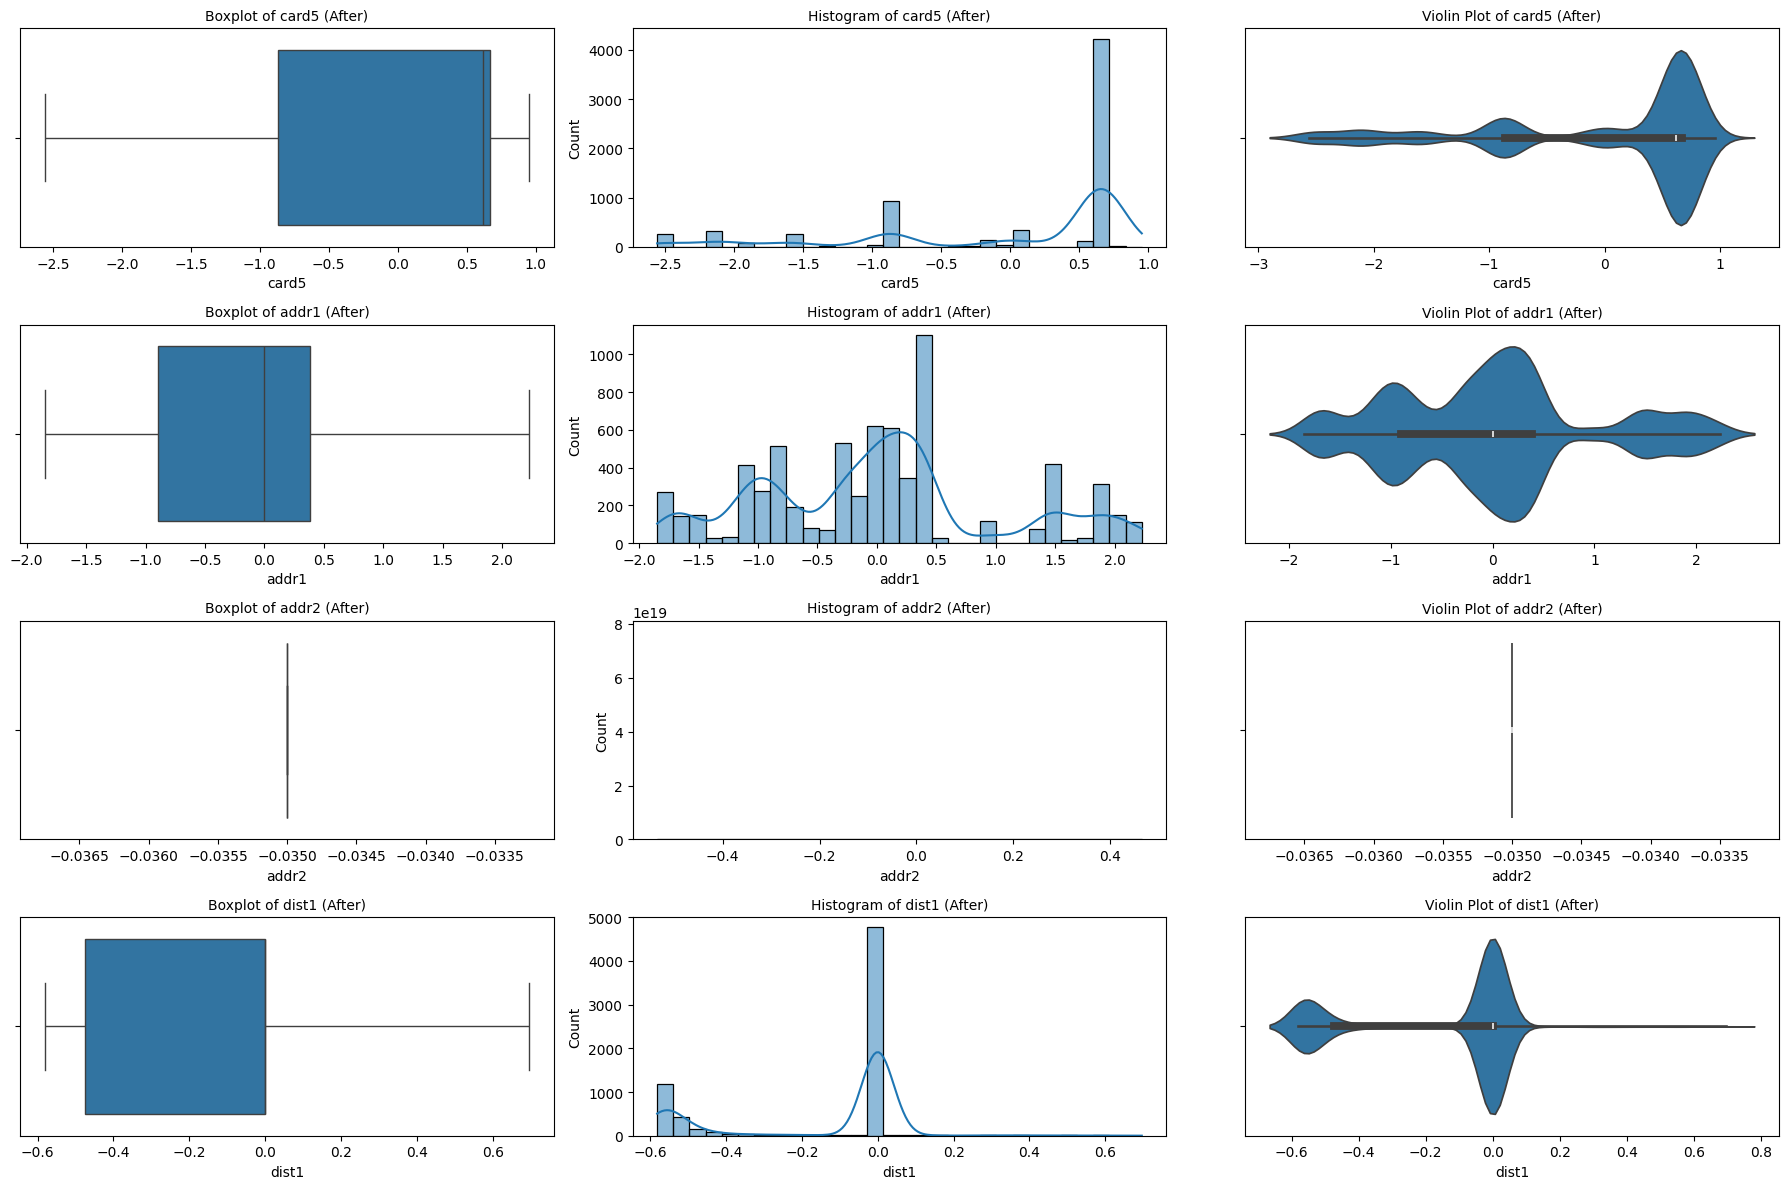

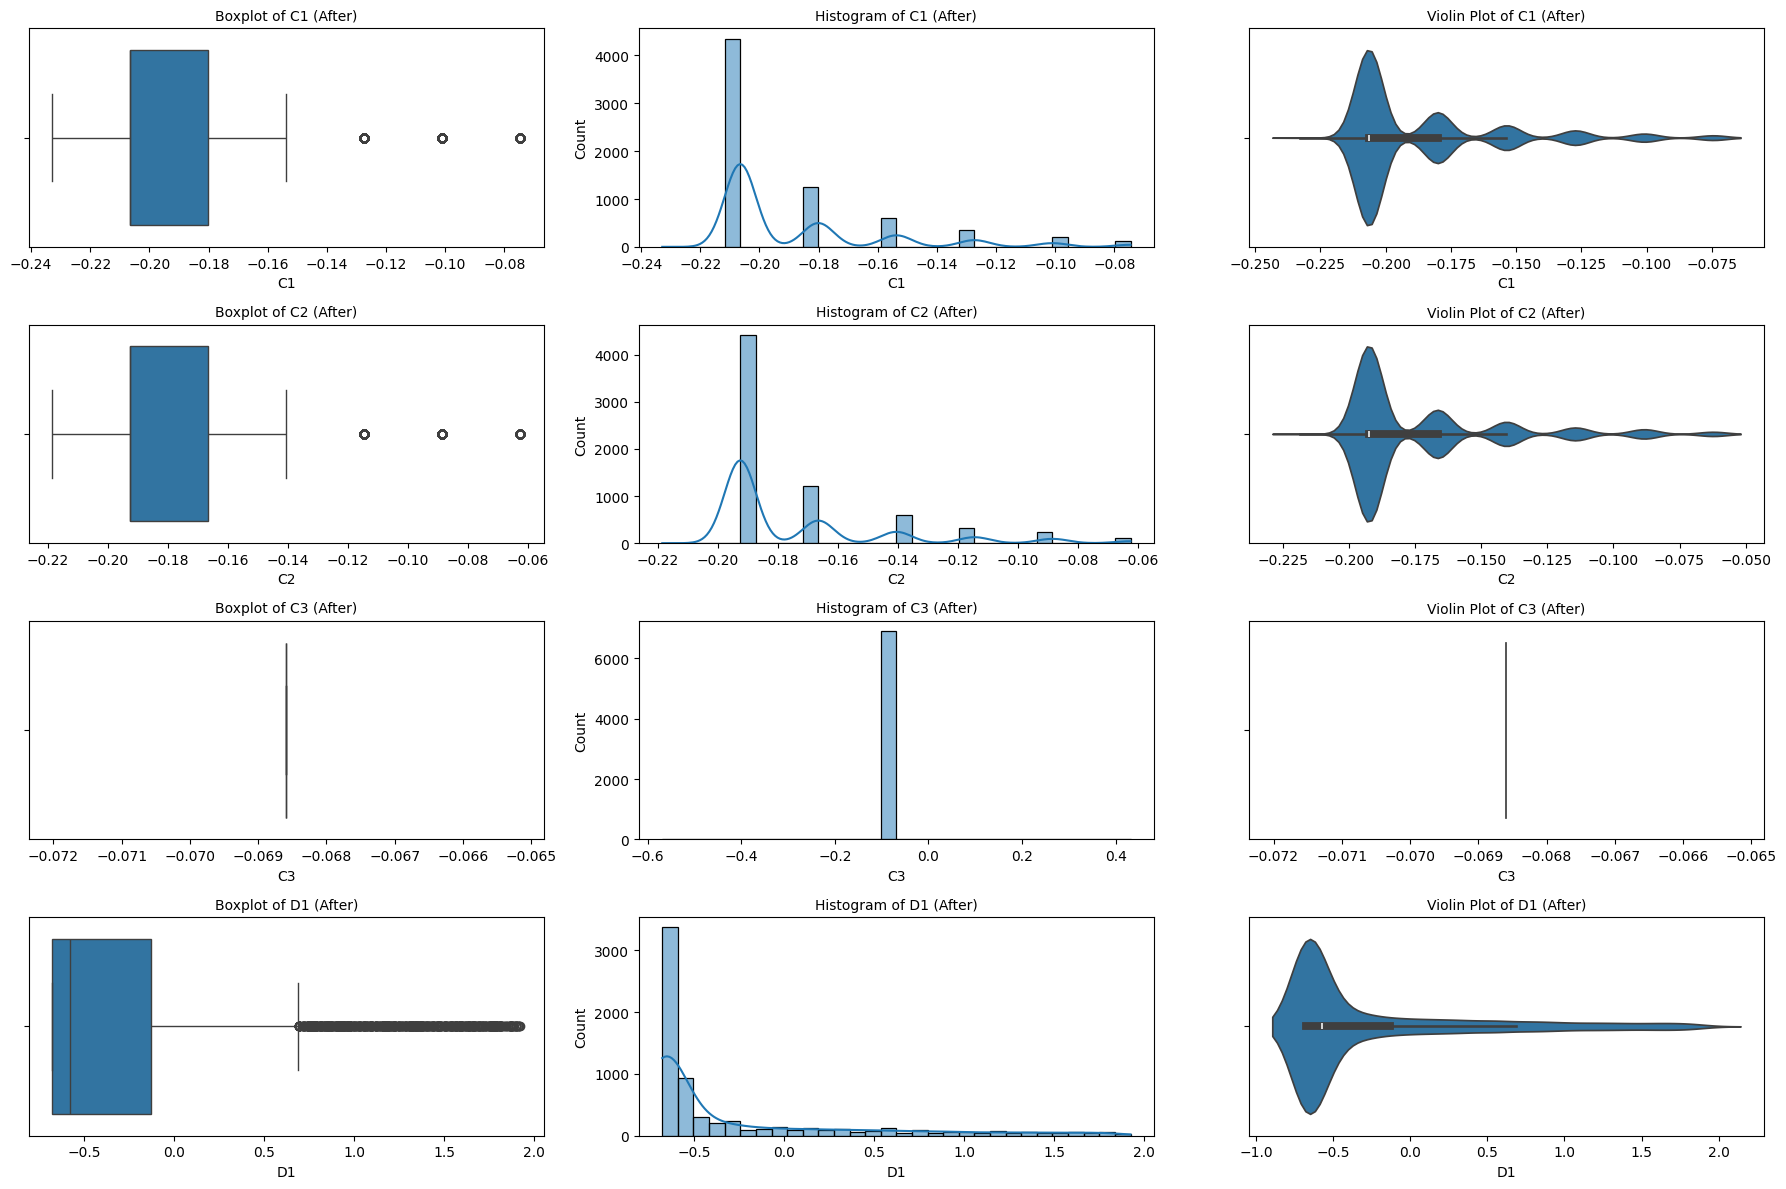

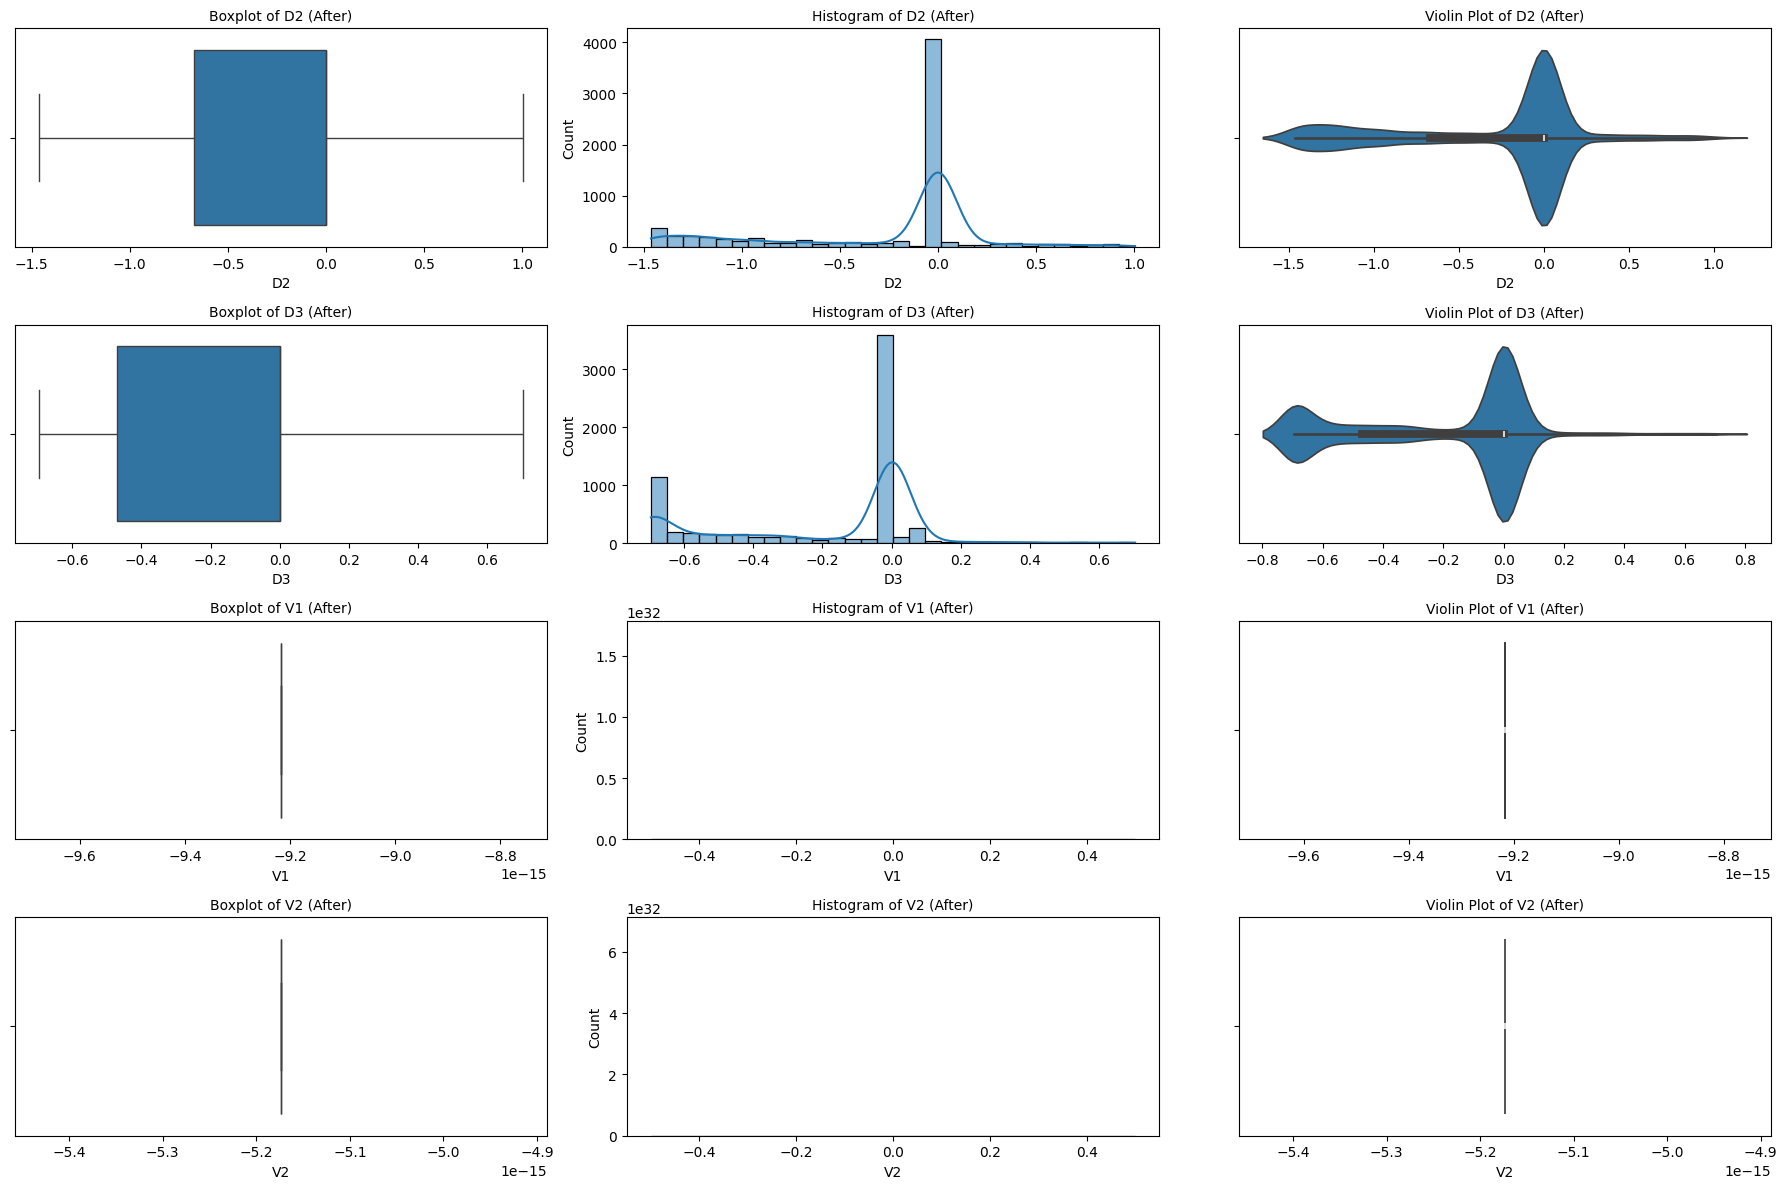

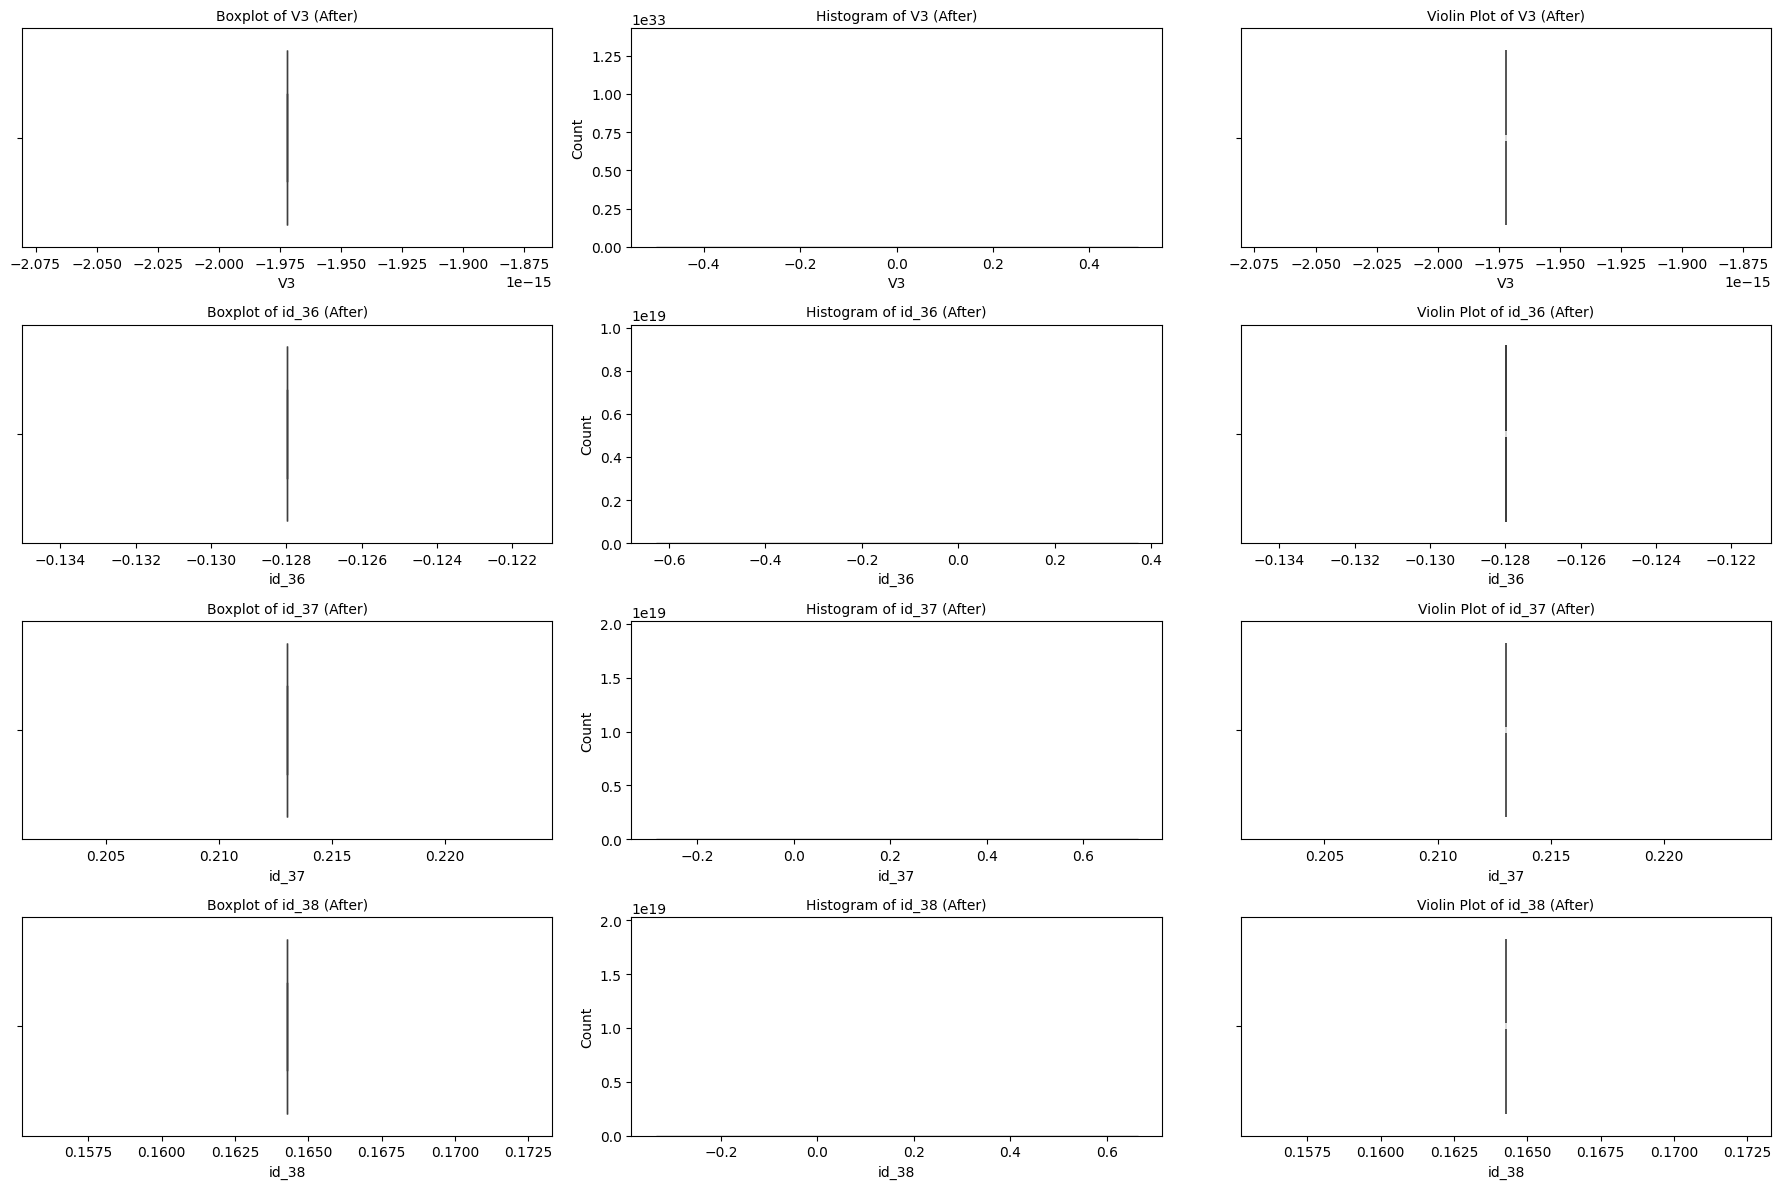

In [27]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]

features = [col for col in important_features if col in train.columns]


df_clean = train.copy()


for col in features:
    median_value = train[col].median()
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean[col] = np.where((train[col] < lower_bound) | (train[col] > upper_bound), median_value, train[col])


batch_size = 4

for i in range(0, len(features), batch_size):
    batch = features[i:i + batch_size]
    plt.figure(figsize=(18, 12))

    for j, col in enumerate(batch):
        # Boxplot
        plt.subplot(len(batch), 3, j * 3 + 1)
        sns.boxplot(x=df_clean[col])
        plt.title(f'Boxplot of {col} (After)', fontsize=10)

        # Histogram
        plt.subplot(len(batch), 3, j * 3 + 2)
        sns.histplot(df_clean[col], bins=30, kde=True)
        plt.title(f'Histogram of {col} (After)', fontsize=10)

        # Violin plot
        plt.subplot(len(batch), 3, j * 3 + 3)
        sns.violinplot(x=df_clean[col])
        plt.title(f'Violin Plot of {col} (After)', fontsize=10)

    plt.tight_layout()
    plt.show()


Distribution of features

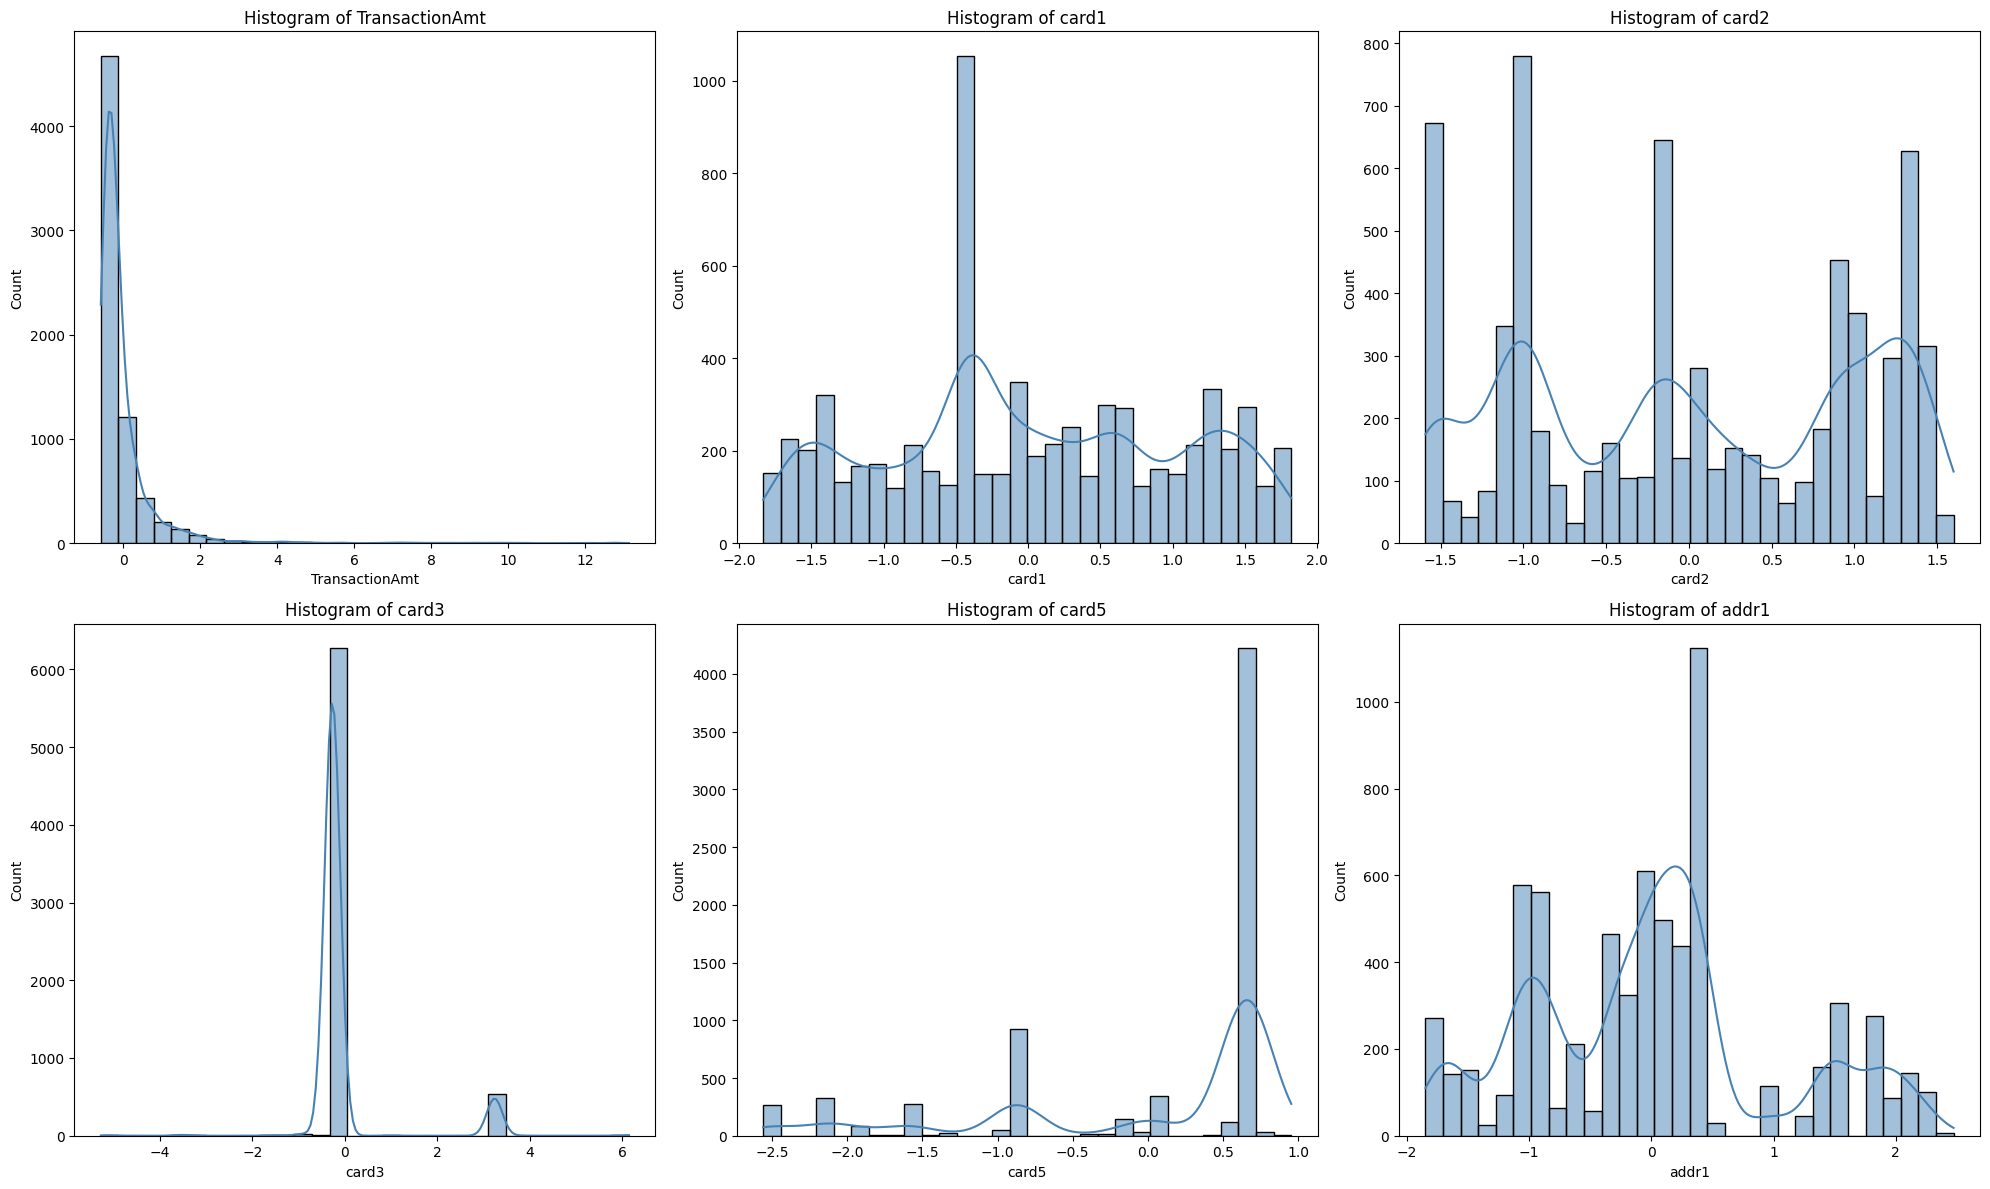

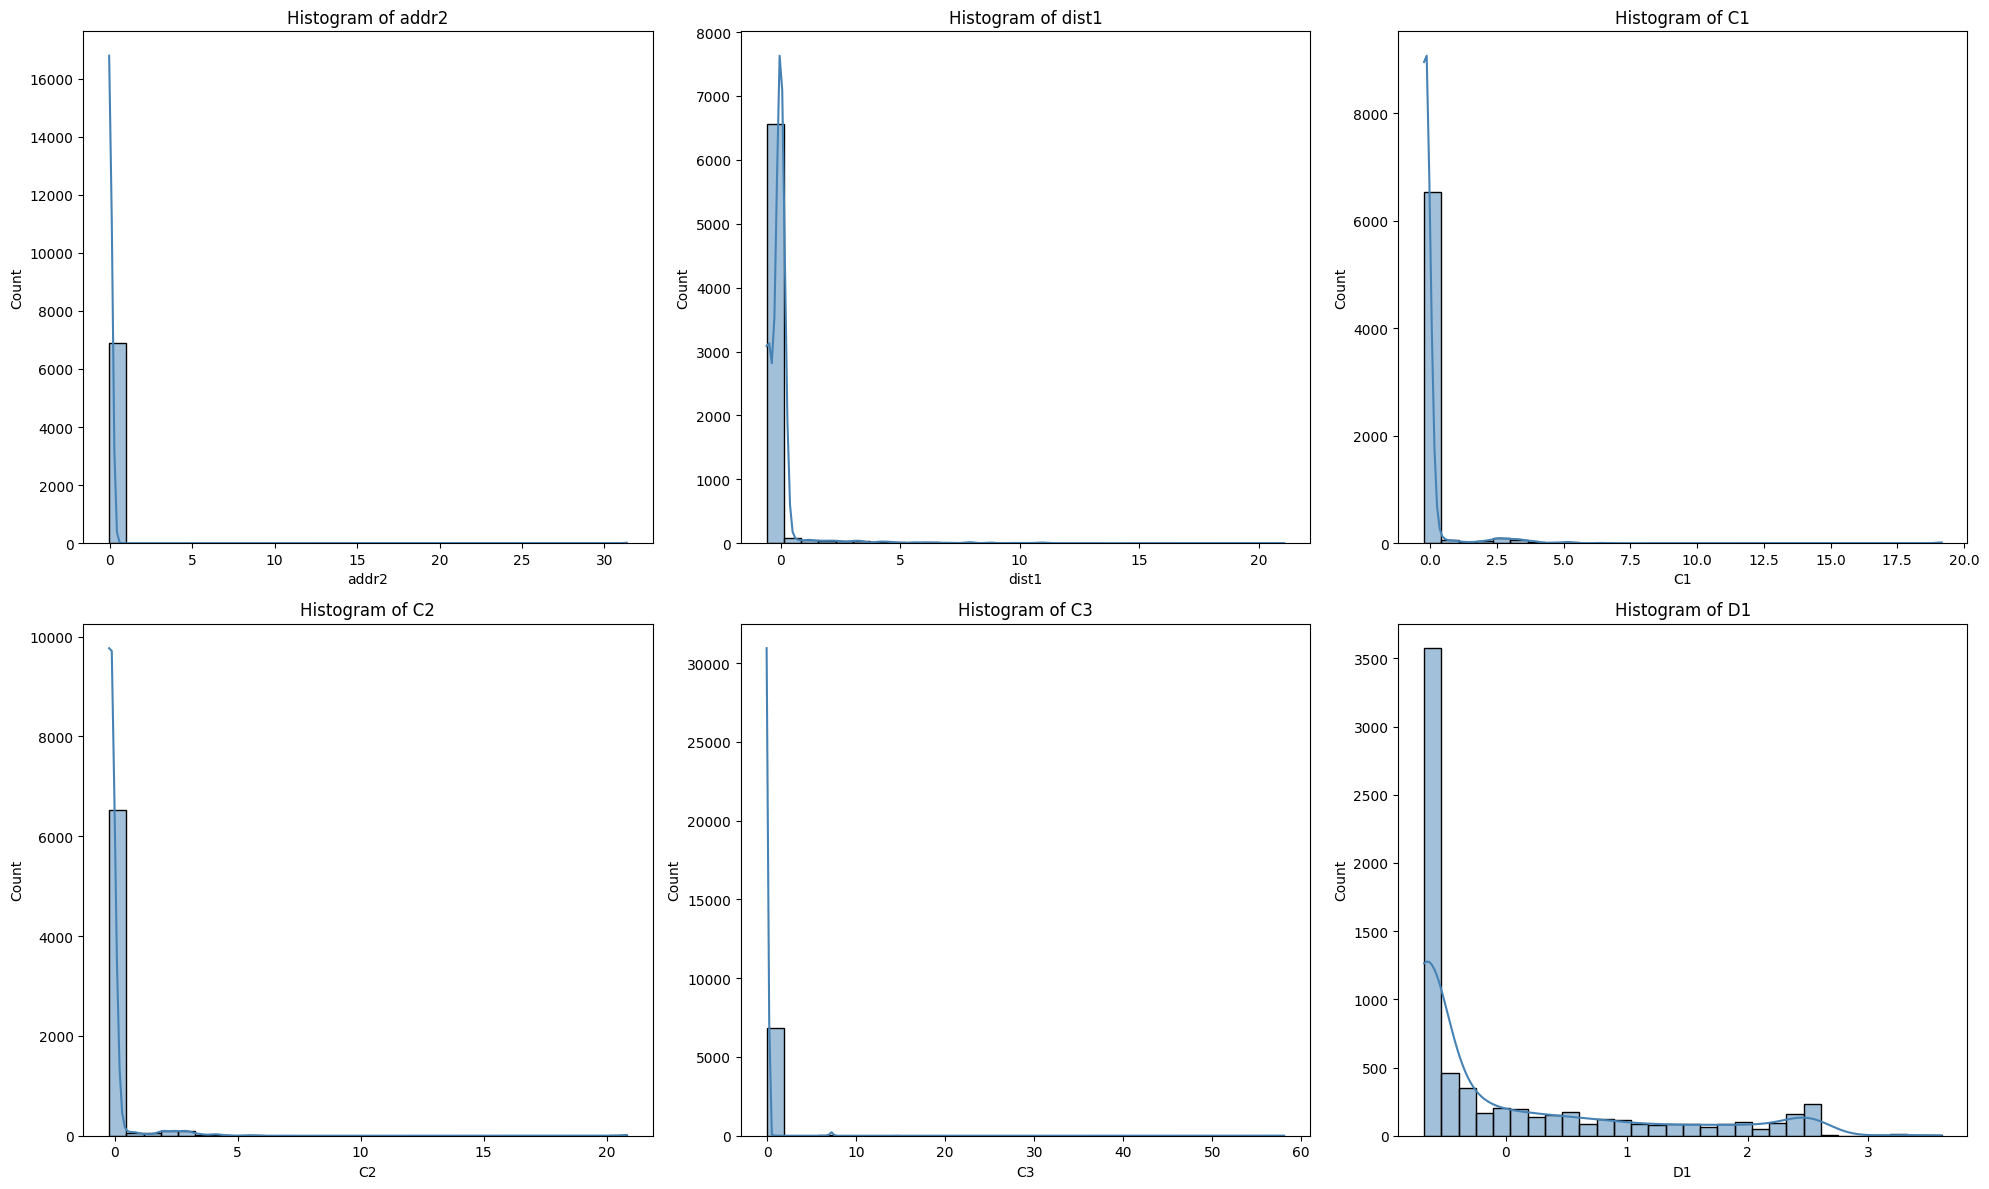

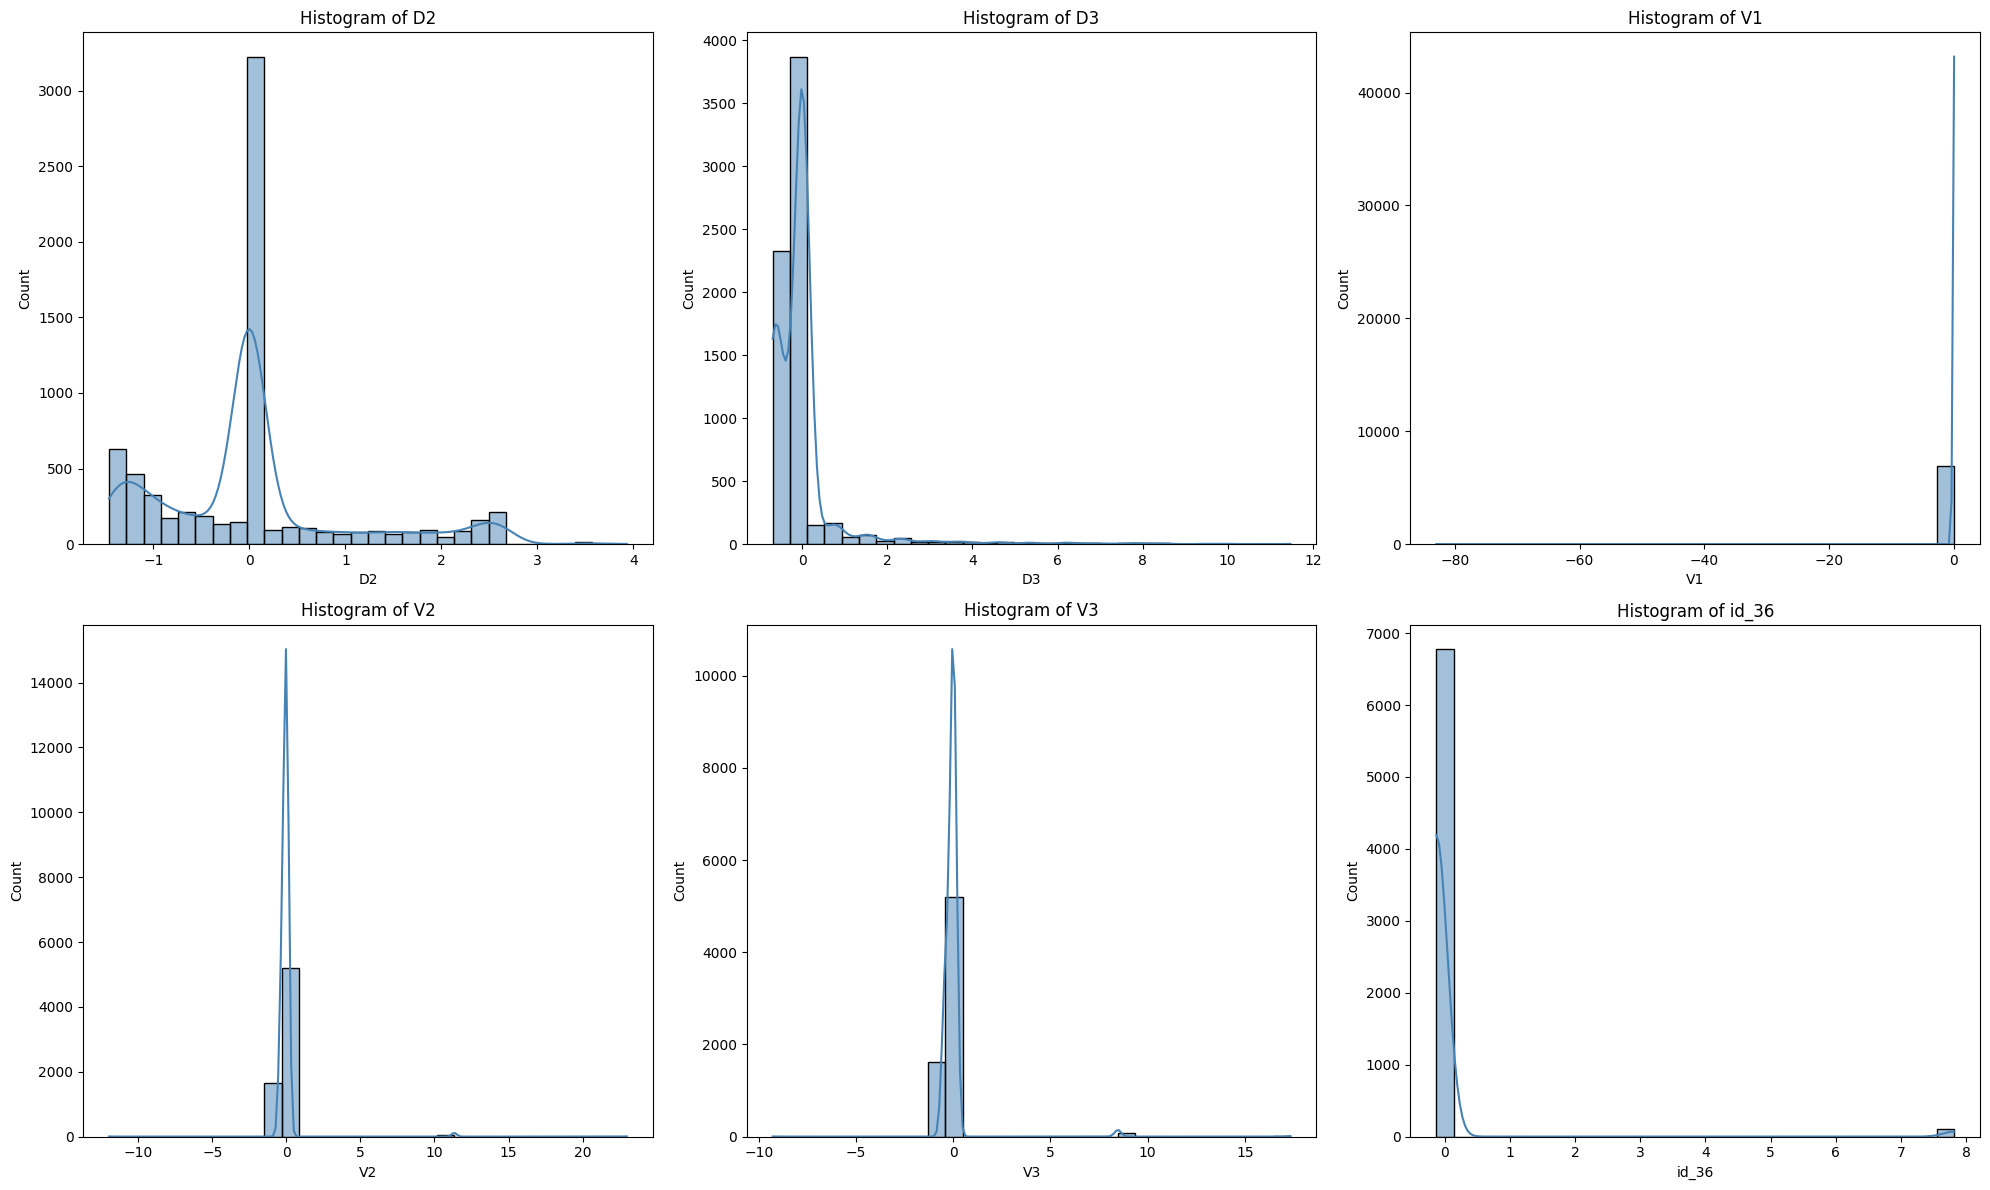

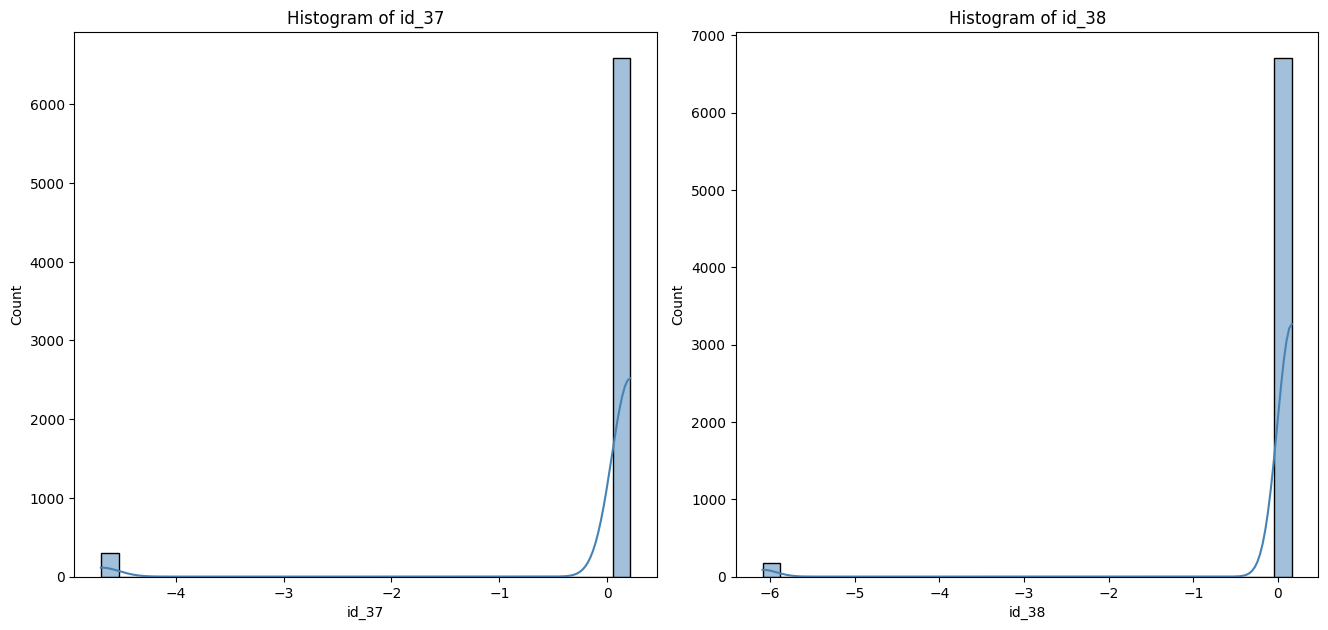

In [28]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]

features = [col for col in important_features if col in train.columns]

# Plot histograms in batches
batch_size = 6

for i in range(0, len(features), batch_size):
    batch = features[i:i + batch_size]
    plt.figure(figsize=(20, 12))

    for j, col in enumerate(batch):
        plt.subplot(2, 3, j + 1)
        sns.histplot(train[col], bins=30, color='steelblue', kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

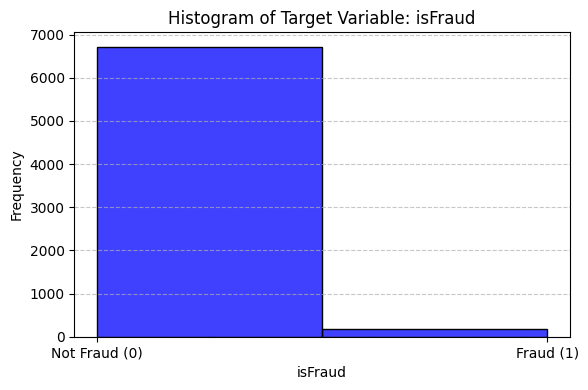

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(train['isFraud'], bins=2, color='blue')
plt.title('Histogram of Target Variable: isFraud')
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import skew, kurtosis
print("Skewness:", skew(train[col].dropna()))
print("Kurtosis:", kurtosis(train[col].dropna()))


Skewness: -5.923025860914866
Kurtosis: 33.08223534906631


# EDA , Bivariate Analysis

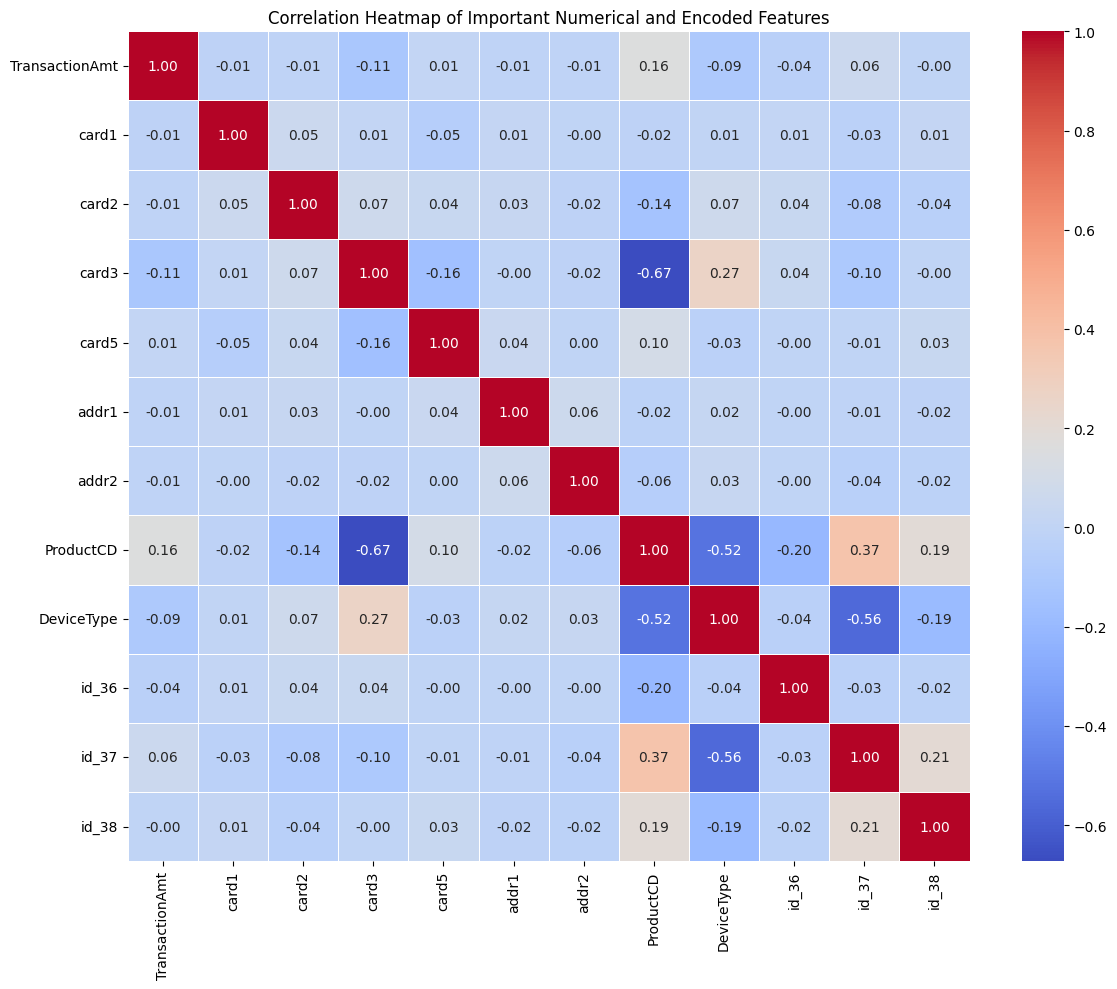

In [31]:
important_numerical_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']


encoded_features = ['ProductCD', 'DeviceType', 'id_36', 'id_37', 'id_38']


selected_features = important_numerical_features + encoded_features

correlation_df = train[selected_features]


corr_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Important Numerical and Encoded Features")
plt.tight_layout()
plt.show()

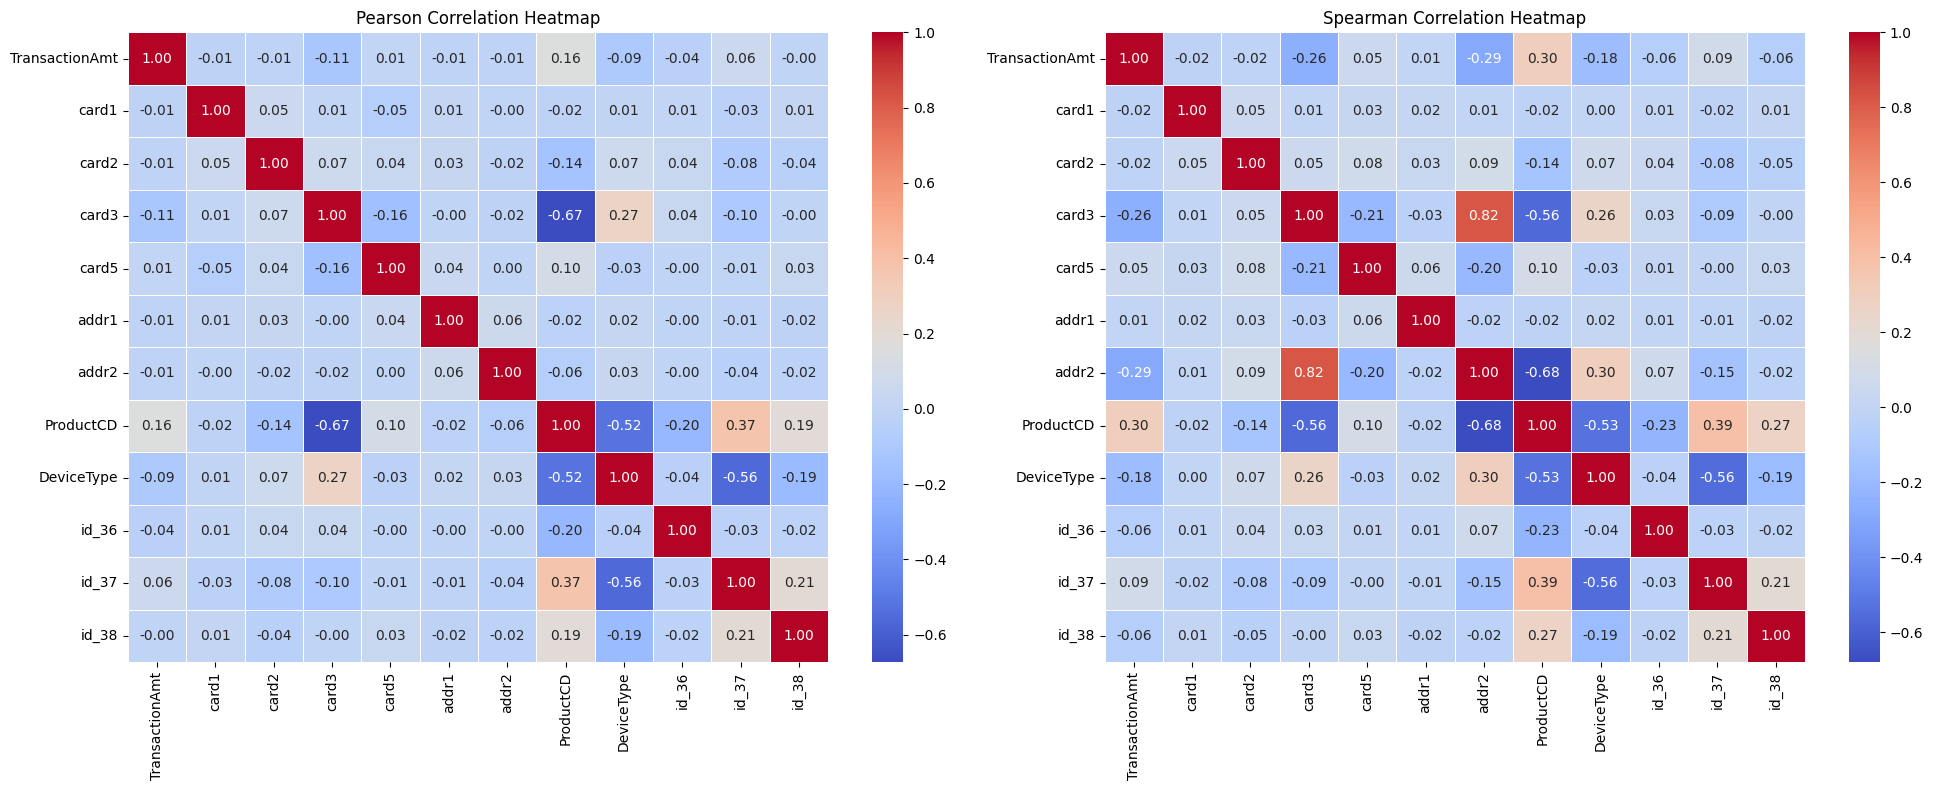

In [32]:
important_numerical_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']
encoded_features = ['ProductCD', 'DeviceType', 'id_36', 'id_37', 'id_38']
selected_features = important_numerical_features + encoded_features


correlation_df = train[selected_features]

pearson_corr = correlation_df.corr(method='pearson')
spearman_corr = correlation_df.corr(method='spearman')


plt.figure(figsize=(20, 8))

# Pearson Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")

# Spearman Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()

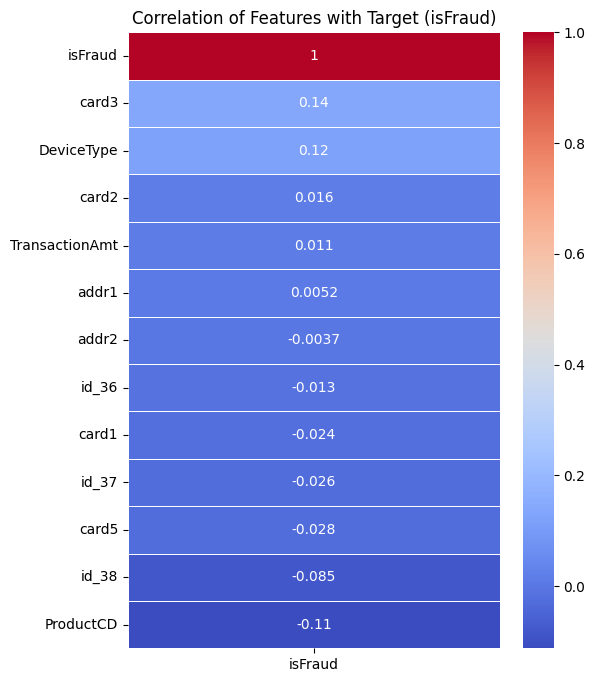

In [33]:
selected_features = important_numerical_features + encoded_features + ['isFraud']

numerical_df = train[selected_features]

# Compute correlation with the target
corr_matrix = numerical_df.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)


plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Features with Target (isFraud)")
plt.show()

# Feature Selection

In [34]:
X = train.drop(columns=['isFraud', 'TransactionID', 'TransactionDT'], errors='ignore')
y = train['isFraud']

Top 10 Mutual Information Features:
 TransactionAmt    0.022038
card1             0.020593
id_19             0.015943
C4                0.013726
id_06             0.012863
C12               0.012634
D8                0.012476
card2             0.011681
C1                0.011503
C13               0.010898
dtype: float64


<ipython-input-35-8b548015f070>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")


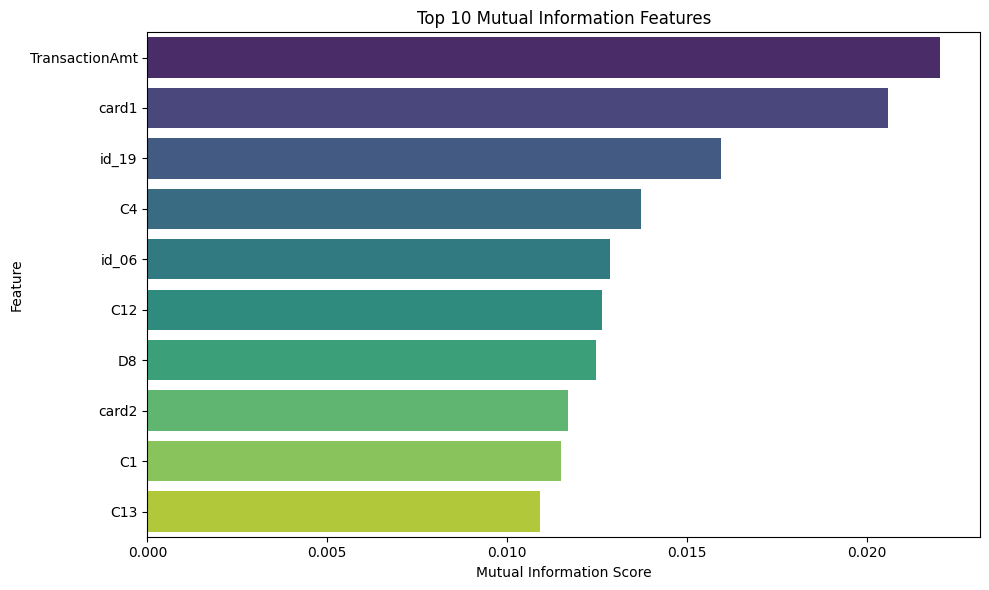

In [35]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_result = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Top 10 Mutual Information Features:\n", mi_result.head(10))
top_mi = mi_result.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")

plt.title("Top 10 Mutual Information Features")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

 Top 10 Chi-Square Features:
 V120          175.920860
V122          155.054738
V112          103.730673
V121           95.491145
DeviceType     90.795932
M4             81.501393
C12            80.753707
V111           66.305240
V113           66.305240
V117           51.684913
dtype: float64


<ipython-input-36-605fe288df0f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chi.values, y=top_chi.index, palette="magma")


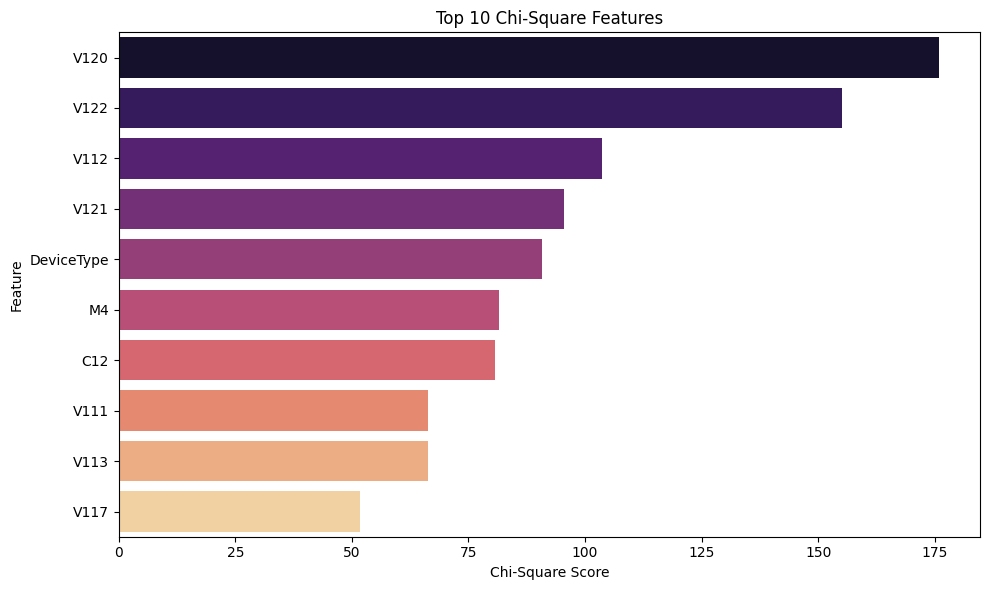

In [36]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)
chi_scores, _ = chi2(X_scaled, y)
chi_result = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)
print(" Top 10 Chi-Square Features:\n", chi_result.head(10))
top_chi = chi_result.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_chi.values, y=top_chi.index, palette="magma")

plt.title("Top 10 Chi-Square Features")
plt.xlabel("Chi-Square Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Top 10 Fisher Score Features:
 card6         0.285534
card3         0.205837
M4            0.193359
V29           0.190280
V30           0.190244
ProductCD     0.190071
id_35         0.175557
D8            0.153797
DeviceType    0.153033
id_16         0.149699
dtype: float64


<ipython-input-37-16e2b6bb8c44>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fisher.values, y=top_fisher.index, palette="coolwarm")


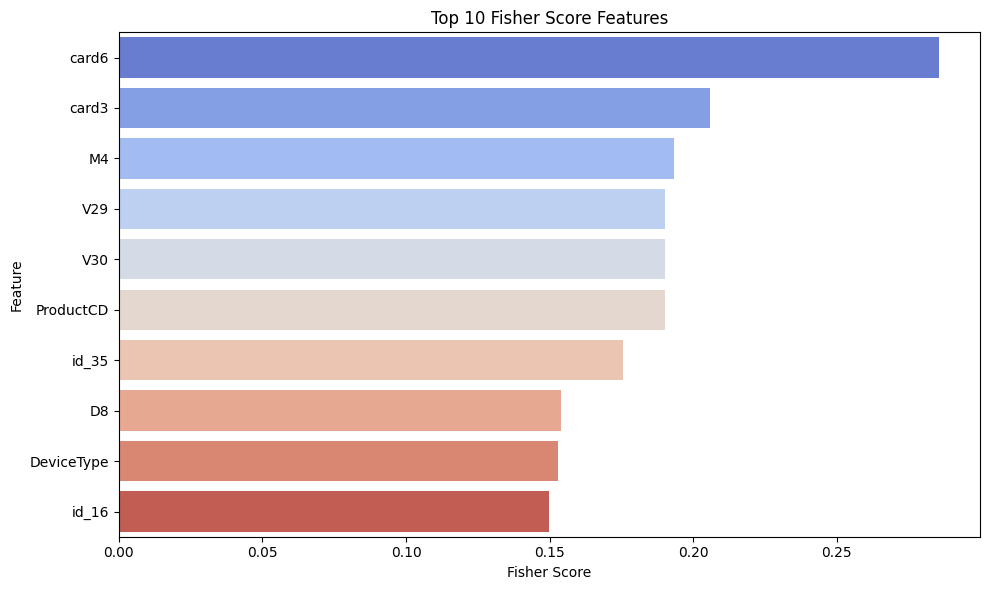

In [37]:
def fisher_score(X_df, y):
    scores = []
    for col in X_df.columns:
        mean0 = X_df[y == 0][col].mean()
        mean1 = X_df[y == 1][col].mean()
        var0 = X_df[y == 0][col].var()
        var1 = X_df[y == 1][col].var()
        score = (mean0 - mean1) ** 2 / (var0 + var1 + 1e-5)
        scores.append(score)
    return pd.Series(scores, index=X_df.columns).sort_values(ascending=False)

fisher_result = fisher_score(X, y)
print("Top 10 Fisher Score Features:\n", fisher_result.head(10))
top_fisher = fisher_result.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fisher.values, y=top_fisher.index, palette="coolwarm")

plt.title("Top 10 Fisher Score Features")
plt.xlabel("Fisher Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 37 152 286 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
<ipython-input-38-e705cd155a55>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_anova.values, y=top_anova.index, palette="Blues_d")


Top 10 ANOVA F-test Features:
 C12     555.676670
V198    231.210196
V201    223.238649
V197    217.855605
V200    192.639234
V120    180.694622
V239    162.571016
V122    158.791734
V238    156.980030
V156    154.941617
dtype: float64


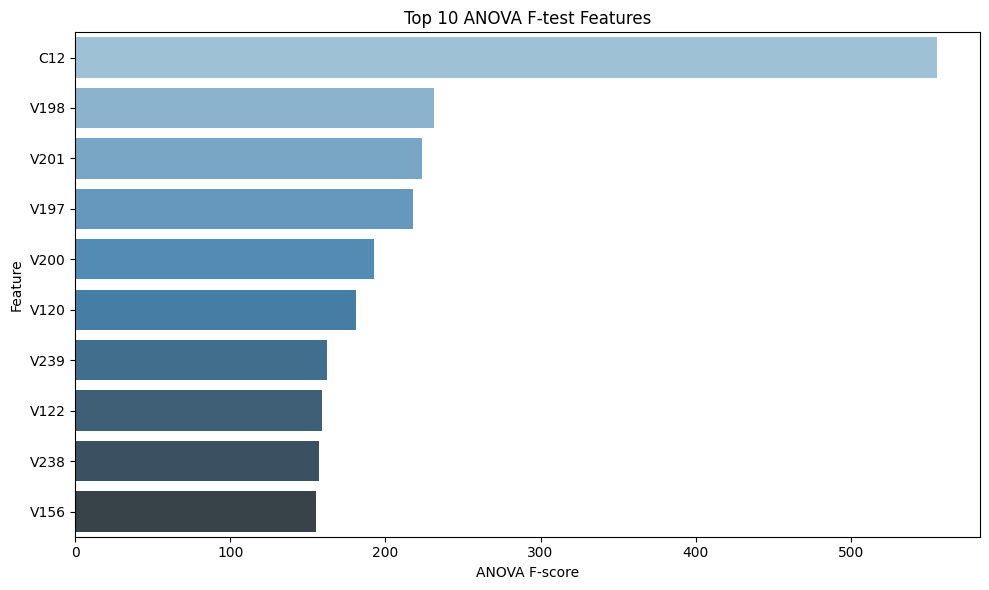

In [38]:
from sklearn.feature_selection import f_classif

f_scores, _ = f_classif(X, y)
anova_result = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
print("Top 10 ANOVA F-test Features:\n", anova_result.head(10))
top_anova = anova_result.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_anova.values, y=top_anova.index, palette="Blues_d")

plt.title("Top 10 ANOVA F-test Features")
plt.xlabel("ANOVA F-score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [39]:
top_features_union = set(mi_result.head(10).index) | \
                     set(chi_result.head(10).index) | \
                     set(fisher_result.head(10).index) | \
                     set(anova_result.head(10).index)
top_features_union = list(top_features_union)

<ipython-input-40-1091428c789a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_scores.values, y=top_features_scores.index, palette="coolwarm")


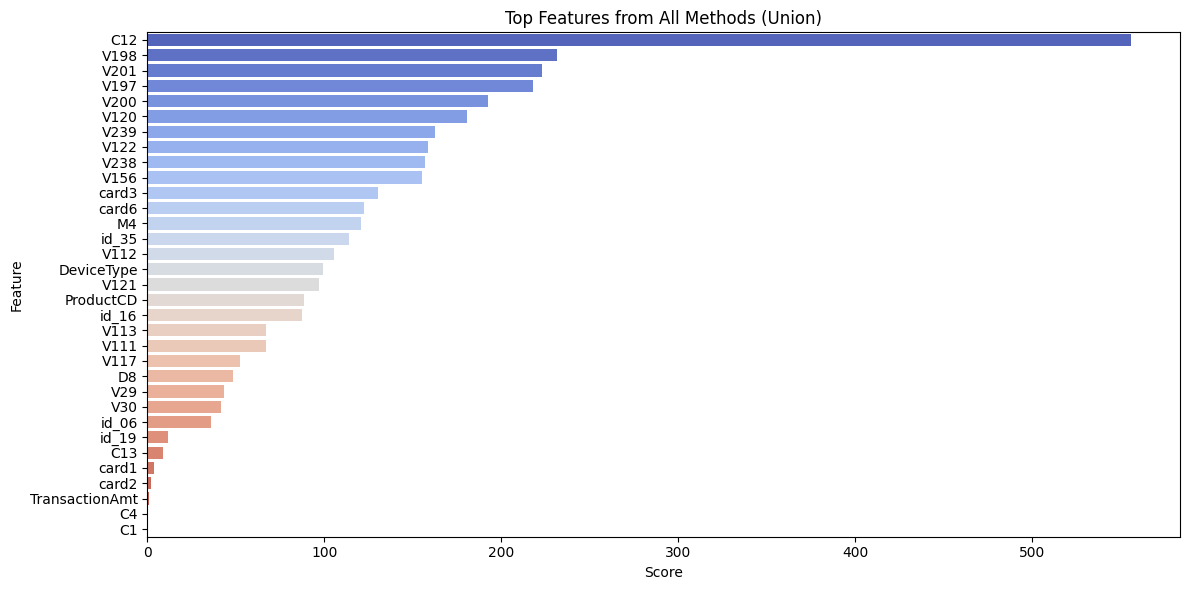

In [40]:
top_features_scores = {}

# Mutual Information Scores
for feature in top_features_union:
    if feature in mi_result.index:
        top_features_scores[feature] = mi_result[feature]

# Chi-Square Scores
for feature in top_features_union:
    if feature in chi_result.index:
        top_features_scores[feature] = chi_result[feature]

# Fisher Scores
for feature in top_features_union:
    if feature in fisher_result.index:
        top_features_scores[feature] = fisher_result[feature]

# ANOVA F-scores
for feature in top_features_union:
    if feature in anova_result.index:
        top_features_scores[feature] = anova_result[feature]

# Convert scores into a pandas Series and sort
top_features_scores = pd.Series(top_features_scores).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_features_scores.values, y=top_features_scores.index, palette="coolwarm")

plt.title("Top Features from All Methods (Union)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()